In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Customer Segmentation**

This project aims at the segmentation of customers into different groups using unsupervised learning algorithms. These algorithms include the following;
- Kmeans
- DBSCAN
- Agglomerative Clustering/Hierarchical clustering

For this approach, the Agglomerative clustering would be used instead of the others.

In [2]:
data = pd.read_csv("../data/segmentation_data.csv")

Kindly refer to the segementation data legend for the interpretation of the numeric values.

In [3]:
data.sample(n=5,random_state=42)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1860,100001861,1,1,43,1,48632,0,0
353,100000354,0,0,28,0,141847,1,1
1333,100001334,1,1,48,2,116235,0,0
905,100000906,0,0,20,0,116582,2,2
1289,100001290,0,0,49,1,118571,2,2


The ID column nont needed and will dropped, this will in turn save memory

In [4]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
data.drop('ID',axis=1,inplace=True)
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [6]:
data.shape

(2000, 7)

As shown show in the data description, there are 2,000 data points with 7 columns(ID column dropped).

### **Preprocessing & EDA**

**Rename columns**

In [7]:
data_prep = data

In [8]:
data_prep.columns = data_prep.columns.str.lower().str.replace(" ","_")
data_prep.columns

Index(['sex', 'marital_status', 'age', 'education', 'income', 'occupation',
       'settlement_size'],
      dtype='object')

**Check for NaN values & duplicated values**

In [9]:
data_prep.isna().sum()

sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

In [10]:
data_prep.duplicated().sum()

0

**Check memory usage and descriptive statistics**


| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

In [11]:
data_prep.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sex              2000 non-null   int64
 1   marital_status   2000 non-null   int64
 2   age              2000 non-null   int64
 3   education        2000 non-null   int64
 4   income           2000 non-null   int64
 5   occupation       2000 non-null   int64
 6   settlement_size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


occupation, education, settle_size, marital status and sex should all be categorical data points

In [12]:
cat = ['sex', 'marital_status', 'education', 'occupation',
       'settlement_size']

for col in cat:
    data_prep[col] = data_prep[col].astype('category')

In [13]:
data_prep.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              2000 non-null   category
 1   marital_status   2000 non-null   category
 2   age              2000 non-null   int64   
 3   education        2000 non-null   category
 4   income           2000 non-null   int64   
 5   occupation       2000 non-null   category
 6   settlement_size  2000 non-null   category
dtypes: category(5), int64(2)
memory usage: 41.8 KB


Memory size has dropped from 109.5 KB to 41.8 KB

In [14]:
data_prep['age'] = data_prep['age'].astype(np.int8)
data_prep['income'] = data_prep['income'].astype(np.int32)

In [15]:
data_prep.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              2000 non-null   category
 1   marital_status   2000 non-null   category
 2   age              2000 non-null   int8    
 3   education        2000 non-null   category
 4   income           2000 non-null   int32   
 5   occupation       2000 non-null   category
 6   settlement_size  2000 non-null   category
dtypes: category(5), int32(1), int8(1)
memory usage: 20.4 KB


Memory size has dropped from 41.8 KB to 20.4 KB

In [16]:
data_prep.describe(include=np.number)

,age,income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


**Observations**
- Mean age is 36, having a mean salar of 120954
- There is minimum deviation inn age, meaning less variance in the dat.
- Median age is 33 years old
- Oldest person is 76 years old.

In [17]:
data_prep.describe(include='category')

,sex,marital_status,education,occupation,settlement_size
count,2000,2000,2000,2000,2000
unique,2,2,4,3,3
top,0,0,1,1,0
freq,1086,1007,1386,1113,989


**Observations**
- There are more males than females in this dataset
- There are more single people that the non-single people
- There are more high scool students than the rest.
- There are more skilled employee/ official people than the rest
- More people come from small cities than mid-sized and big cities

In [18]:
eda = data_prep

In [19]:
print(eda.select_dtypes(include=pd.CategoricalDtype).columns)
print(eda.select_dtypes(include=pd.CategoricalDtype).columns.value_counts().sum())

Index(['sex', 'marital_status', 'education', 'occupation', 'settlement_size'], dtype='object')
5


In [20]:
num_list = eda.select_dtypes(exclude=pd.CategoricalDtype).columns.to_list()
num_list

['age', 'income']

In [21]:
def range_cal(arr):
    return arr.max() - arr.min()

In [22]:
def summary_stats(group:str,column):
    try:
        if eda[column].dtype !=pd.CategoricalDtype:
            group_data = (
                eda.groupby(group)[column].agg(
                    [
                        (f"total_{column}",'sum'),
                        (f'average_{column}','mean'),
                        (f'deviation_{column}','std'),
                        (f"range_{column}",range_cal),
                        (f"skewness_level_{column}","skew")
                    ]
                ).reset_index()
            )
            return group_data
        else:
            group_data = (
                eda.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}",'count')
                    ]
                ).reset_index()
            )
            return group_data
    except KeyError:
        print(f"This is the list of keys: {eda.columns}")

**Skewness**
|Range|Comment|
|---|---|
|skewness is between -0.5 & 0.5|nearly symmetrical.|
|skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed)|slightly skewed.|
|skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed)|extremely skewed.|

- If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
- If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
- If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In [23]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'violet',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'blue',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }


In [24]:
def plotting_bar(x:str,group:str):
    try:
        fig,ax = plt.subplots(1,2,figsize=(20,10),constrained_layout=True)
        ax = ax.ravel()
        cats = ['sex', 'marital_status', 'education', 'occupation', 'settlement_size']
        for cat in cats:
            if group == cat:
                labels = eda[group].sort_values().unique().to_list()
                name = group
            # else: 
            #     labels = ['A',"B","C","D"]
            #     name = group
                grouped_agg = eda.groupby(group)[x].agg(
                    [(f"{x}_mean", 'mean'),(f"{x}_deviation", 'std')]).reset_index()

                # my_palette = sns.color_palette("husl",2)
                sns.set_theme(style='whitegrid',rc=rc,palette='husl')

                sns.barplot(data=grouped_agg, x=group, y=f'{x}_mean', ax=ax[0])
                sns.barplot(data=grouped_agg, x=group, y=f'{x}_deviation', ax=ax[1])

                ax[0].set_title(f'Calculated Mean {x}',fontdict=font_title)
                ax[0].set_xlabel(f"{name}", fontdict=font_label)
                ax[0].set_ylabel(f"Calculated Mean {x}", fontdict=font_label)
                ax[0].set_xticklabels(labels,rotation=45,fontsize=20)

                ax[1].set_title(f'Calculated Deviation {x}',fontdict=font_title)
                ax[1].set_xlabel(f"{name}", fontdict=font_label)
                ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict=font_label)
                ax[1].set_xticklabels(labels,rotation=45,fontsize=20)

                fig.suptitle(f"Mean & Deviation Bar Plots"
                            ,fontdict=font_fig,fontweight='bold'
                            ,fontsize=40)
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

**Looking into sex**

In [25]:
# num_list
# ['age', 'income']

In [26]:
cats = ['sex', 'marital_status', 'education', 'occupation', 'settlement_size']
sex = summary_stats(column=num_list[0],group=cats[0])
sex

,sex,total_age,average_age,deviation_age,range_age,skewness_level_age
0,0,41132.0,37.874770,11.549013,57,0.856399
1,1,30686.0,33.573304,11.495586,58,1.310032


In [27]:
cats = ['sex', 'marital_status', 'education', 'occupation', 'settlement_size']
sex = summary_stats(column=num_list[1],group=cats[0])
sex

,sex,total_income,average_income,deviation_income,range_income,skewness_level_income
0,0,138763895,127775.225599,39821.354629,243563,1.062436
1,1,103144943,112850.047046,34266.333929,273532,1.378790


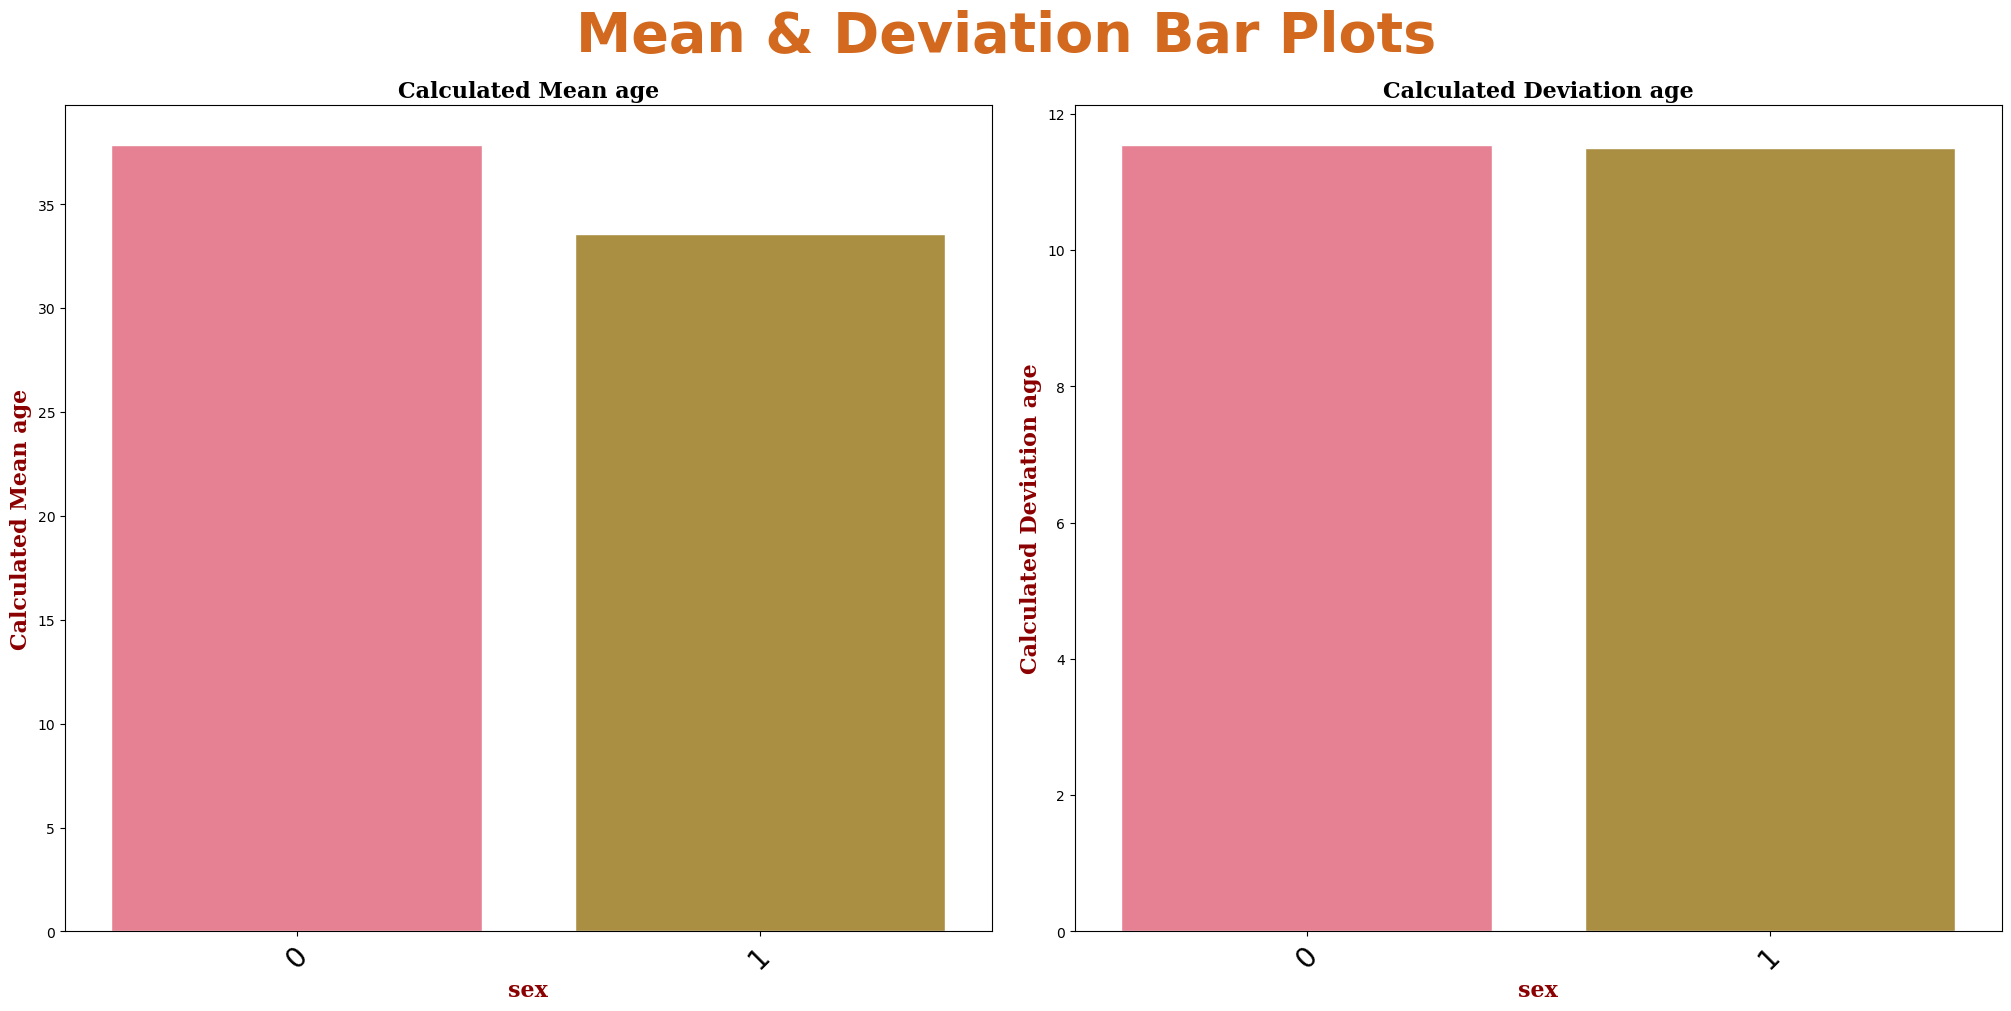

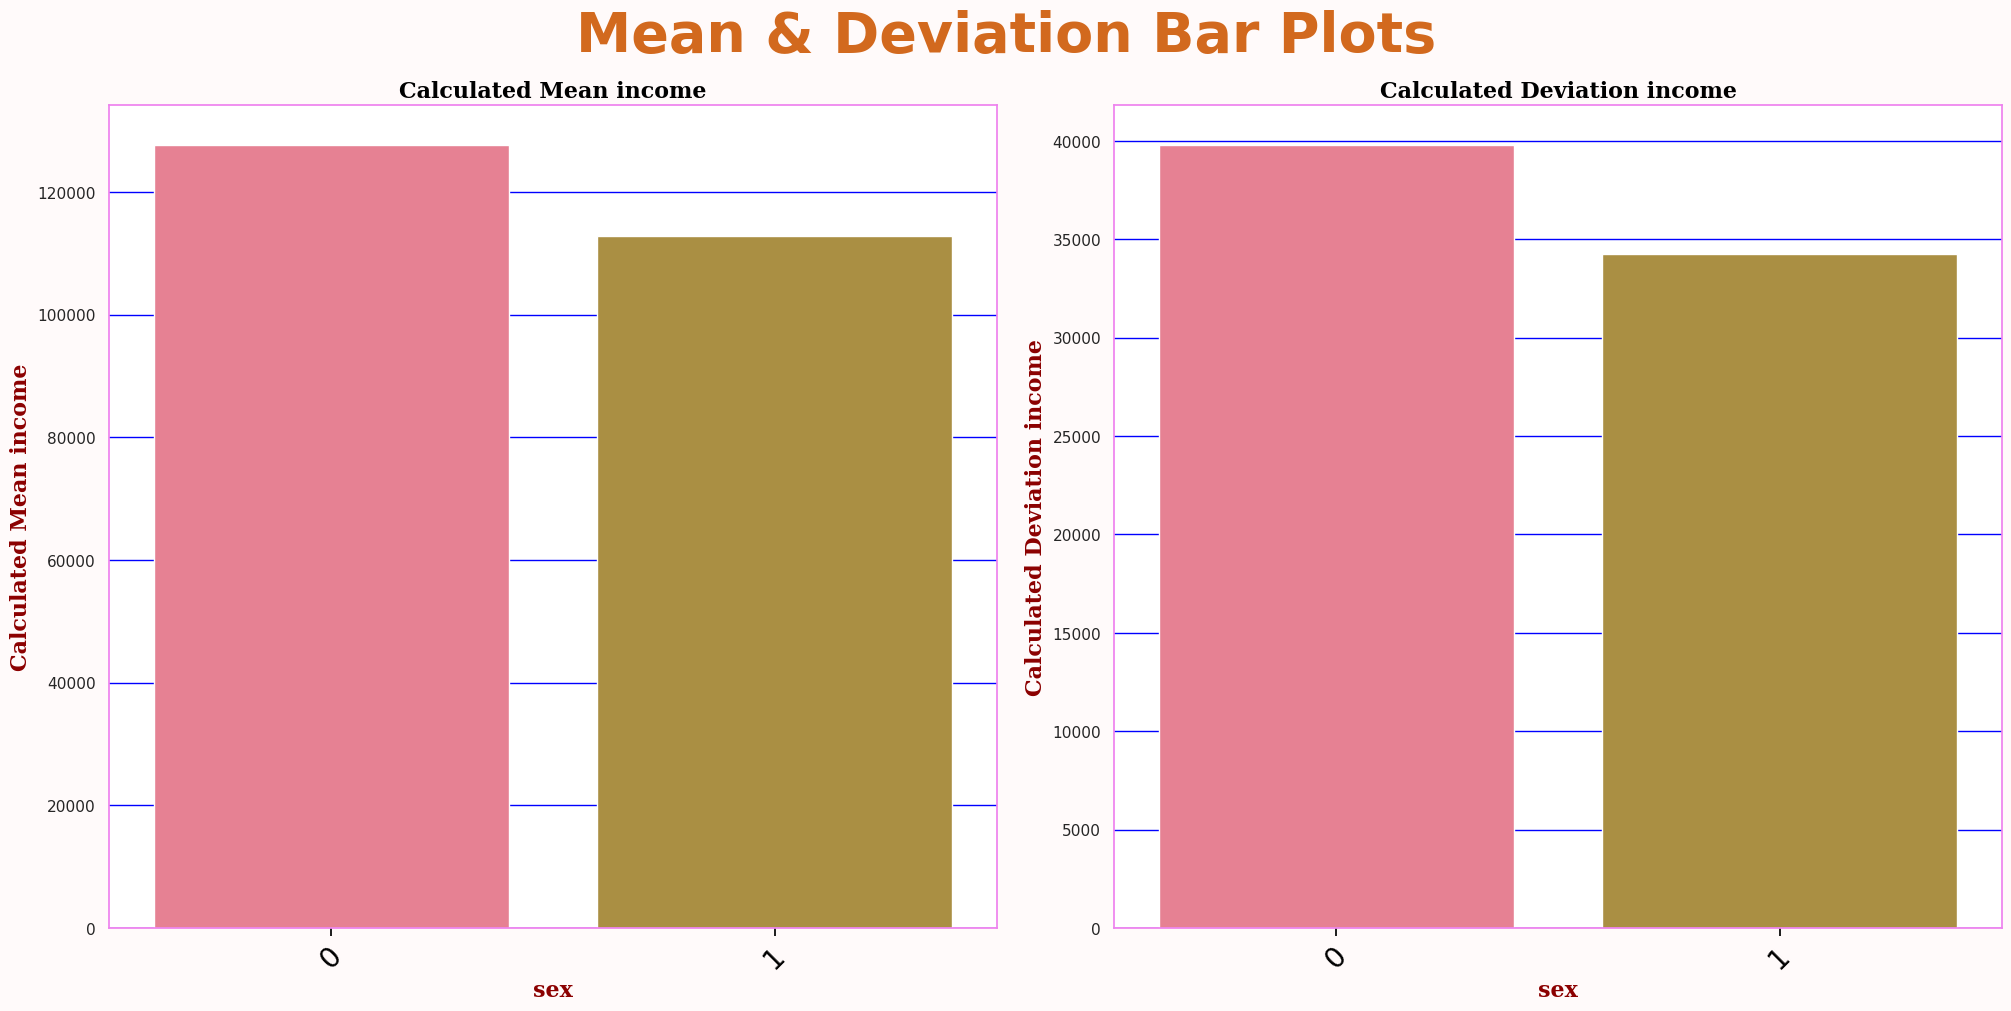

In [28]:
for value in num_list:
    plotting_bar(x=value,group='sex')

**Observations**
- Mean age for men is higher than that of females but there deviation is same.
- Men have a higher mean income than that of females but their deviation from mean is quite high; high spread in income for men.
- There is a slight skewness in the income of both genders
- There is a slight skewness in the age of both genders, although men have a lower skewness level than females.

**Looking into marital_status**

In [29]:
marital_status = summary_stats(column=num_list[0],group=cats[1])
marital_status

,marital_status,total_age,average_age,deviation_age,range_age,skewness_level_age
0,0,38658.0,38.389275,11.326854,56,0.851805
1,1,33160.0,33.393756,11.579278,58,1.331932


In [30]:
marital_status = summary_stats(column=num_list[1],group=cats[1])
marital_status

,marital_status,total_income,average_income,deviation_income,range_income,skewness_level_income
0,0,124602386,123736.232373,39370.686617,250487,1.132365
1,1,117306452,118133.385700,36589.295150,273532,1.258713


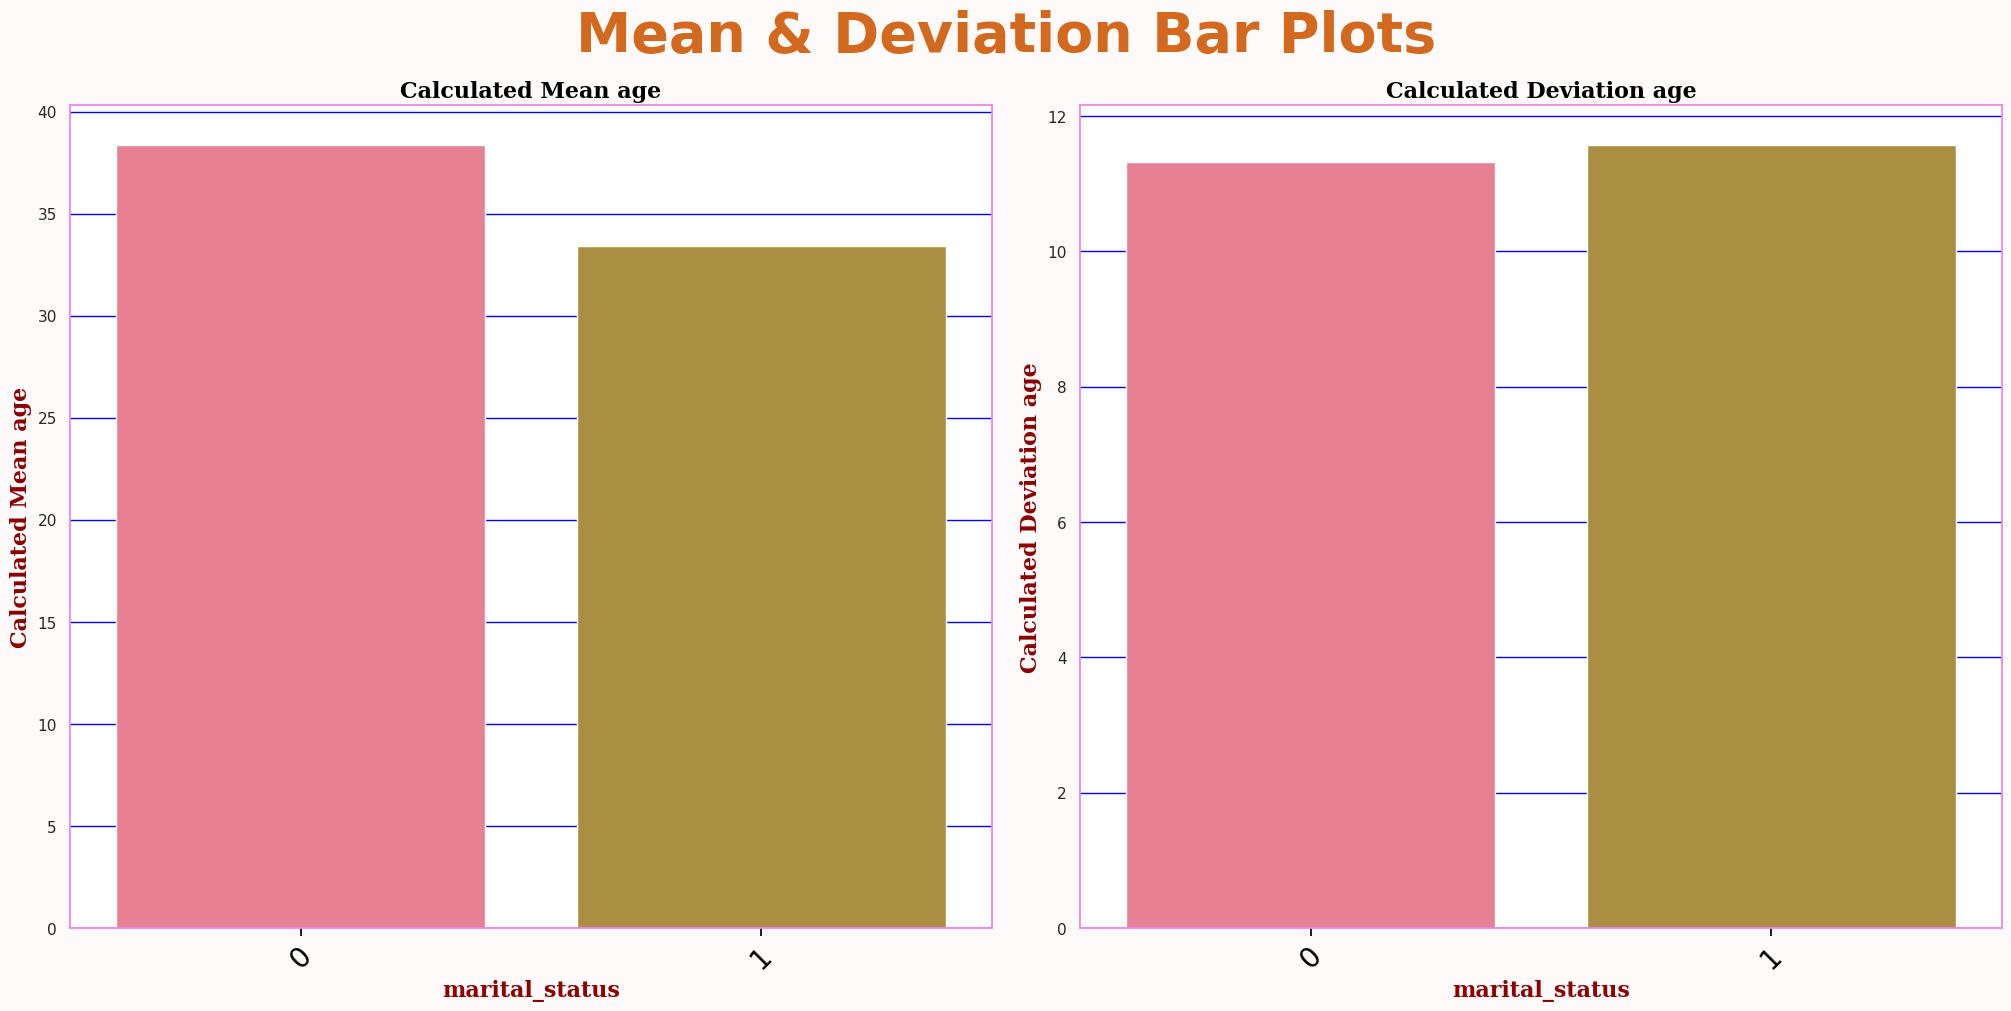

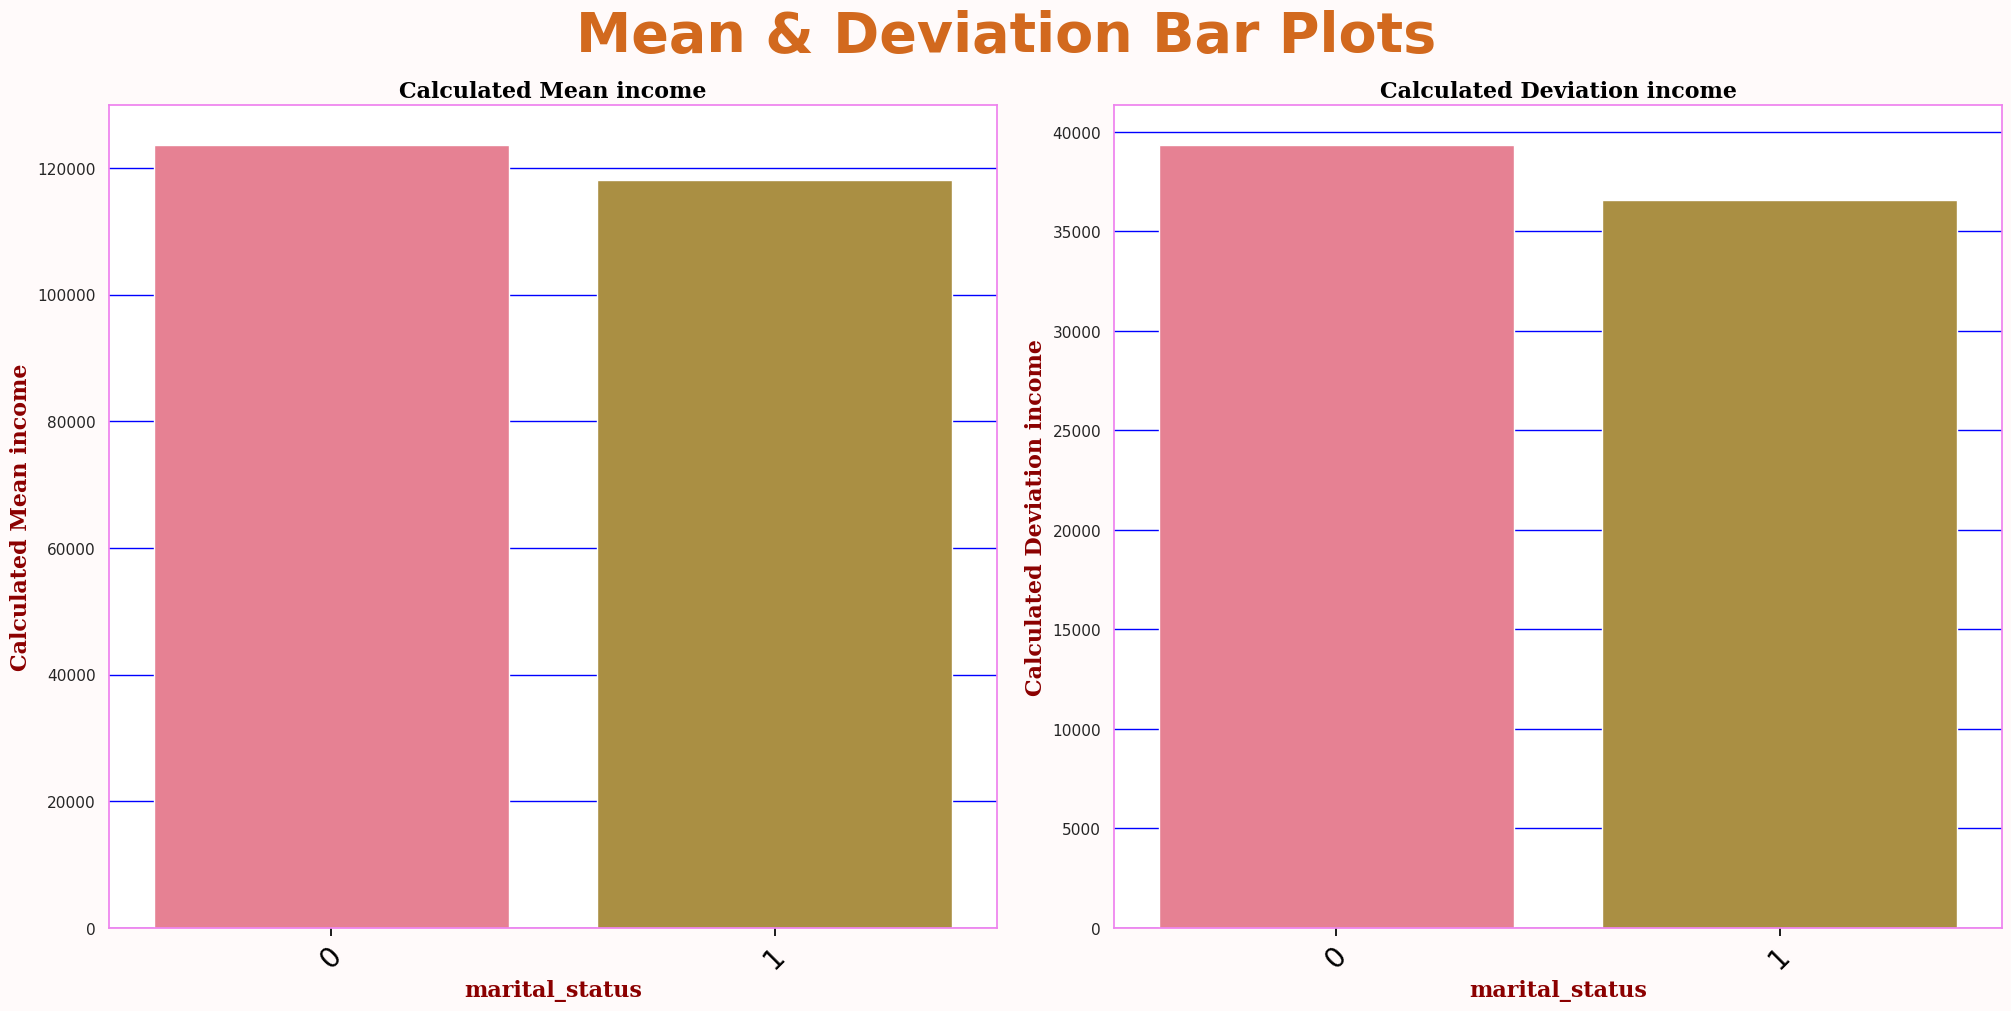

In [31]:
for value in num_list:
    plotting_bar(x=value,group='marital_status')

**Observations**
- The mean age for single people seems to be greater than than those of the non-single(divorced / separated / married / widowed). Higher life expectancy?
- The age deviation in females is slightly higher than that of males in terms of age; much spread in the data for non-single people.
- Single people have a higher mean income than non-single people.
- Single people have a higher standard deviation that non-people; higher spread in single people.
- Slight skewness in the both marital status in both age and income.

**Looking into education**

In [32]:
education = summary_stats(column=num_list[0],group=cats[2])
education

,education,total_age,average_age,deviation_age,range_age,skewness_level_age
0,0,7866.0,27.407666,3.235134,13,-0.219549
1,1,46211.0,33.341270,8.387785,40,0.518733
2,2,15689.0,53.914089,8.965615,37,0.144253
3,3,2052.0,57.000000,17.381435,51,-0.821601


In [33]:
education = summary_stats(column=num_list[1],group=cats[2])
education

,education,total_income,average_income,deviation_income,range_income,skewness_level_income
0,0,33024577,115068.212544,40058.777044,211514,0.988842
1,1,161285660,116367.720058,32636.570352,272659,0.950019
2,2,42313141,145405.982818,48501.606672,257482,1.181768
3,3,5285460,146818.333333,37635.665122,144877,-0.303424


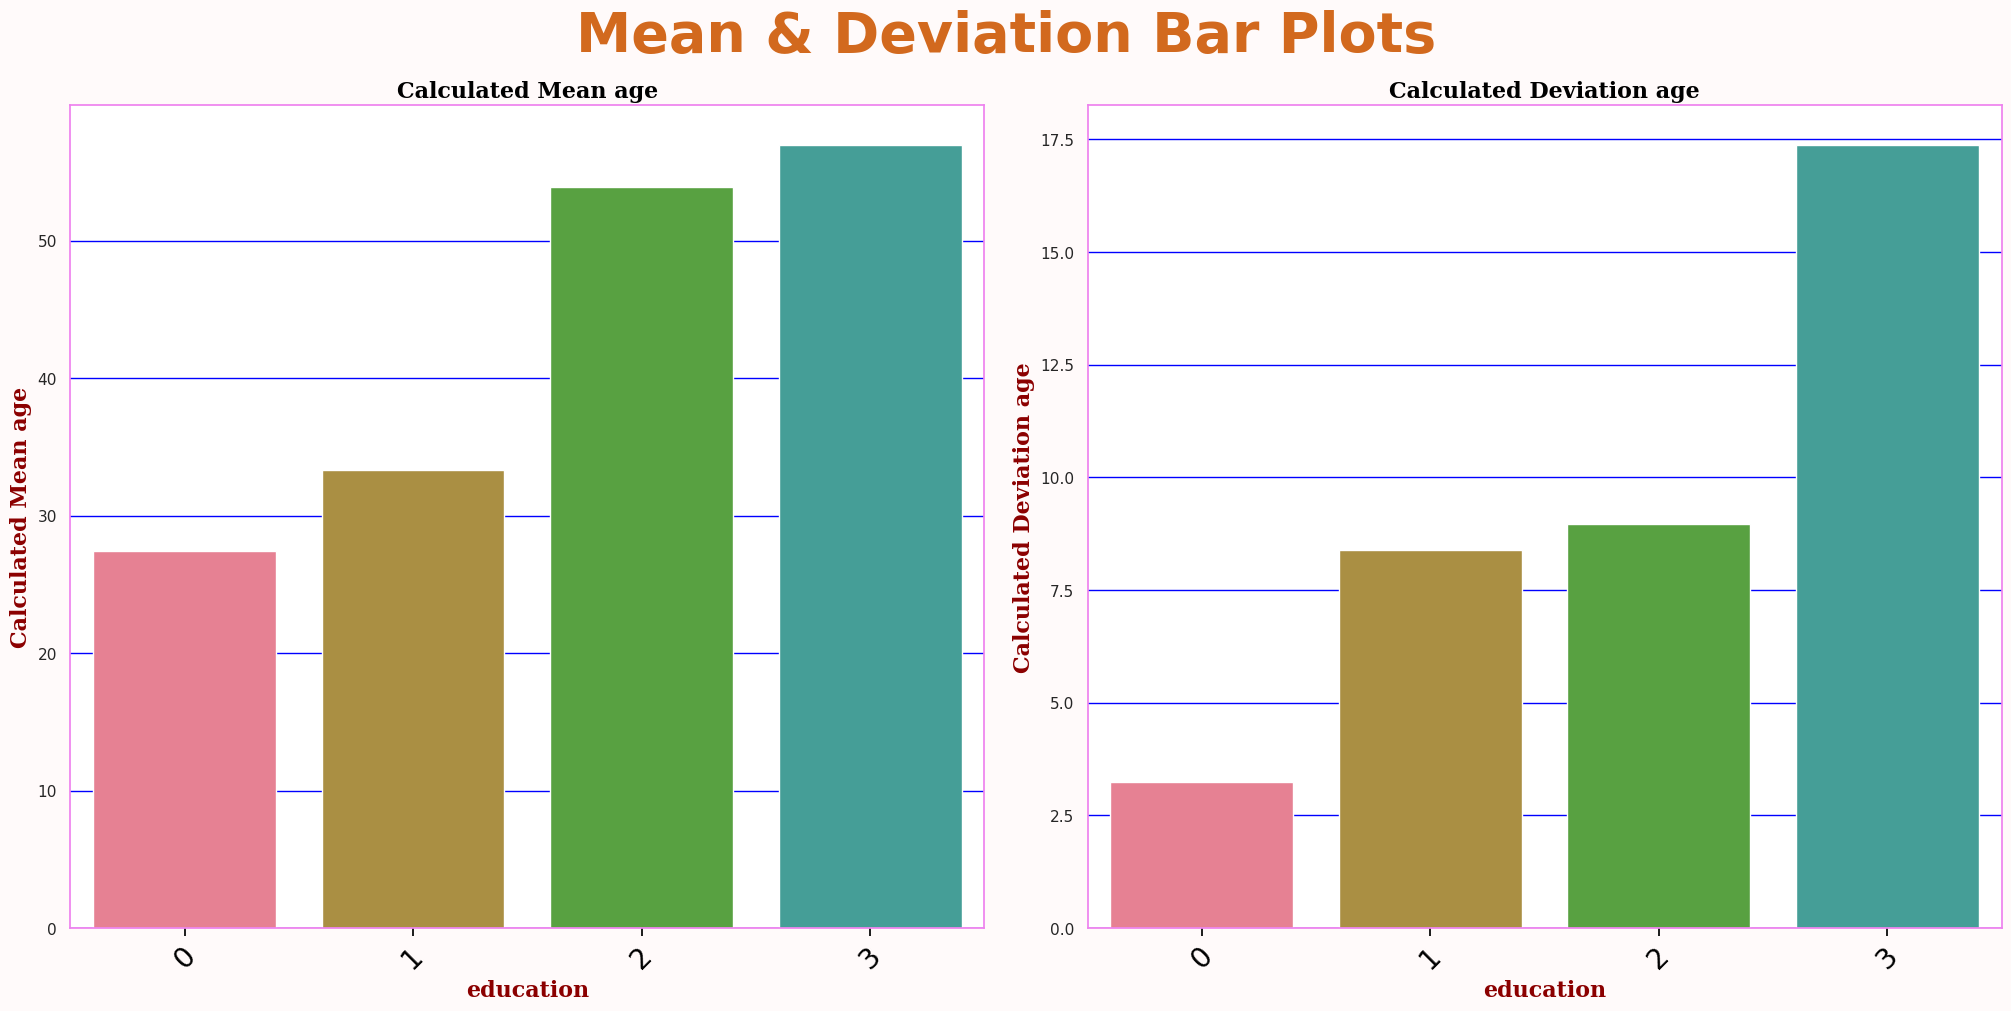

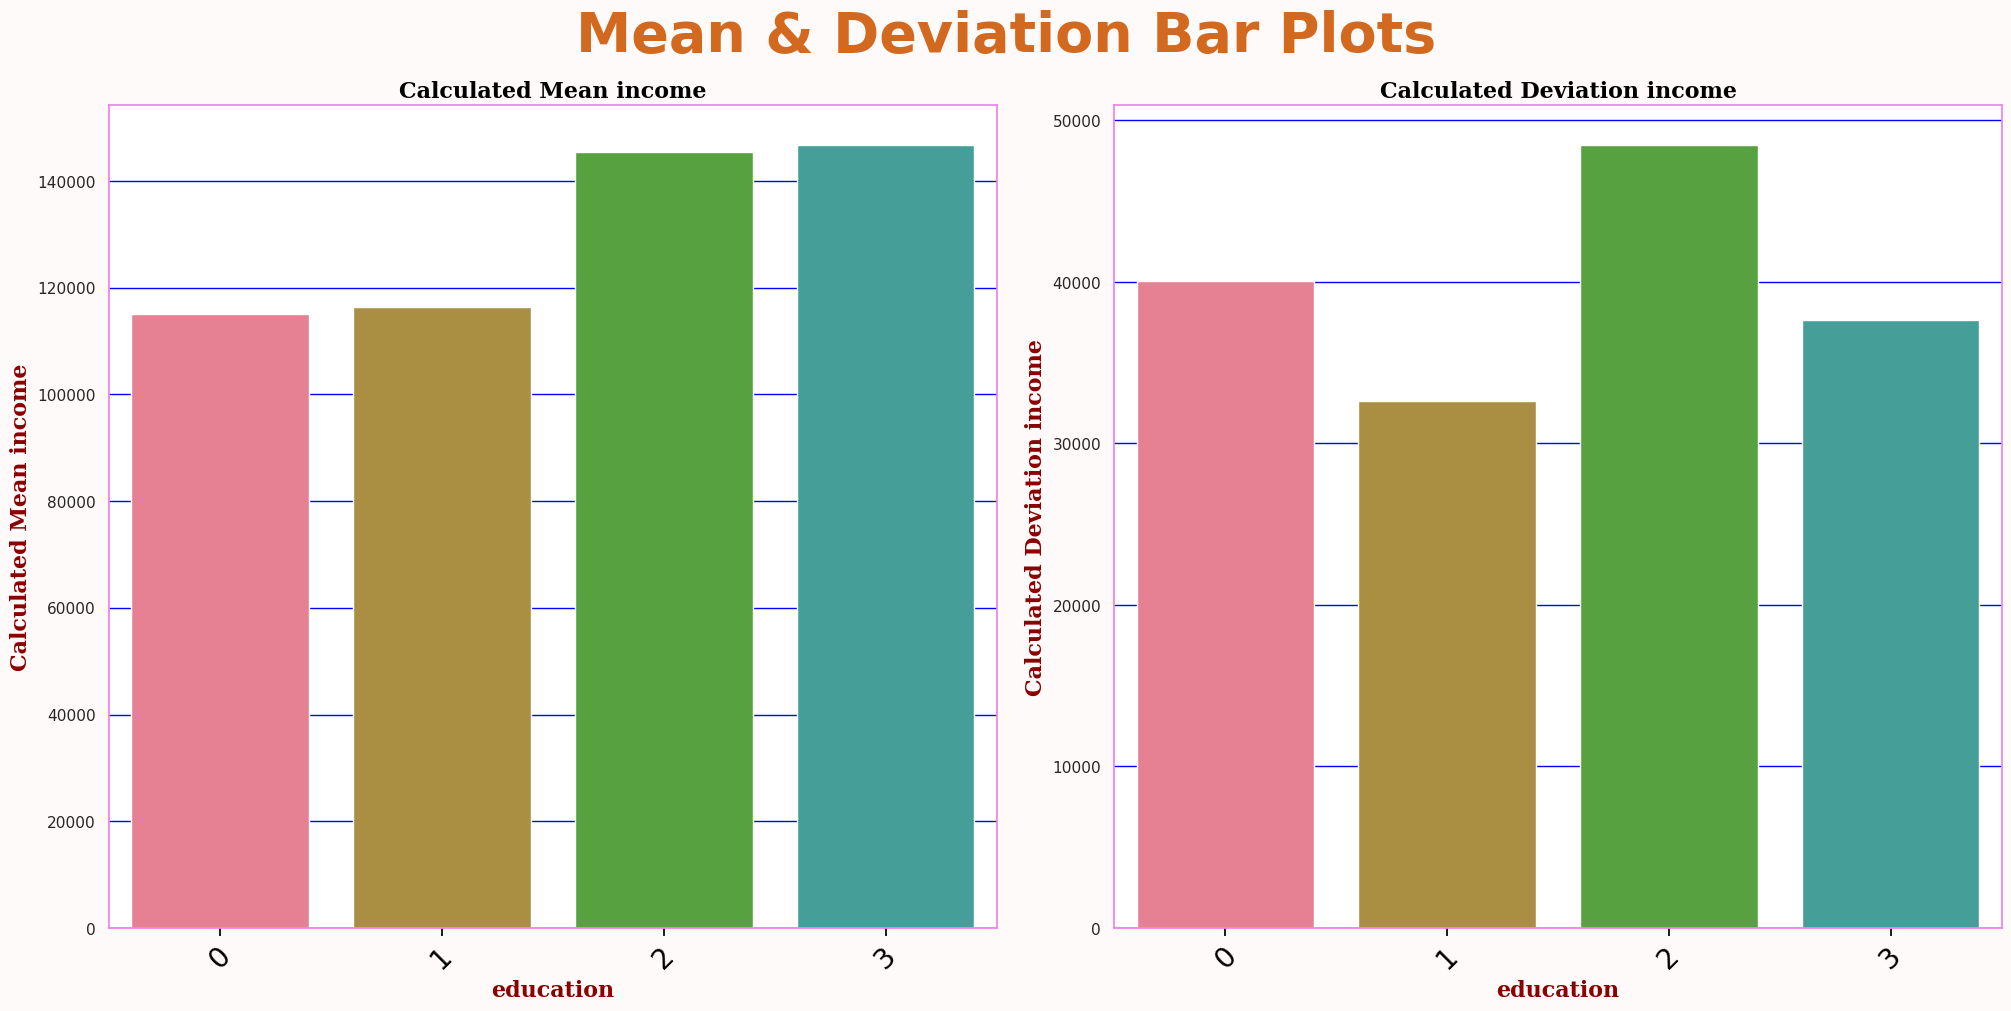

In [34]:
for value in num_list:
    plotting_bar(x=value,group='education')

**Observations**
- Mean age for education class 0 is the lowest and the highest is education class 3 and same goes for the deviation; less spread for education class 0 and a higher spread for education class 3.
- Mean income for both education class 2 and 3 are almost the same and same goes for education class 0 and 1.
- Standard deviation for educational class 2 is highest amongst all others; higher spread.
- In terms of age, skewness levels are relatively symmetrical except for class 4 which is slighty skewed.
- In terms of income, almost all classes are highly skewed while that of class 4 has the lowest skewness level.

**Looking into occupation**

In [35]:
occupation = summary_stats(column=num_list[0],group=cats[3])
occupation

,occupation,total_age,average_age,deviation_age,range_age,skewness_level_age
0,0,22387.0,35.366509,11.342131,55,0.972772
1,1,39032.0,35.069182,11.424119,53,1.019542
2,2,10399.0,40.940945,12.686259,56,1.007765


In [36]:
occupation = summary_stats(column=num_list[1],group=cats[3])
occupation

,occupation,total_income,average_income,deviation_income,range_income,skewness_level_income
0,0,57499968,90837.232227,23943.549449,145171,0.630009
1,1,139653089,125474.473495,24745.006378,185942,1.488324
2,2,44755781,176203.862205,43903.518363,218864,0.882357


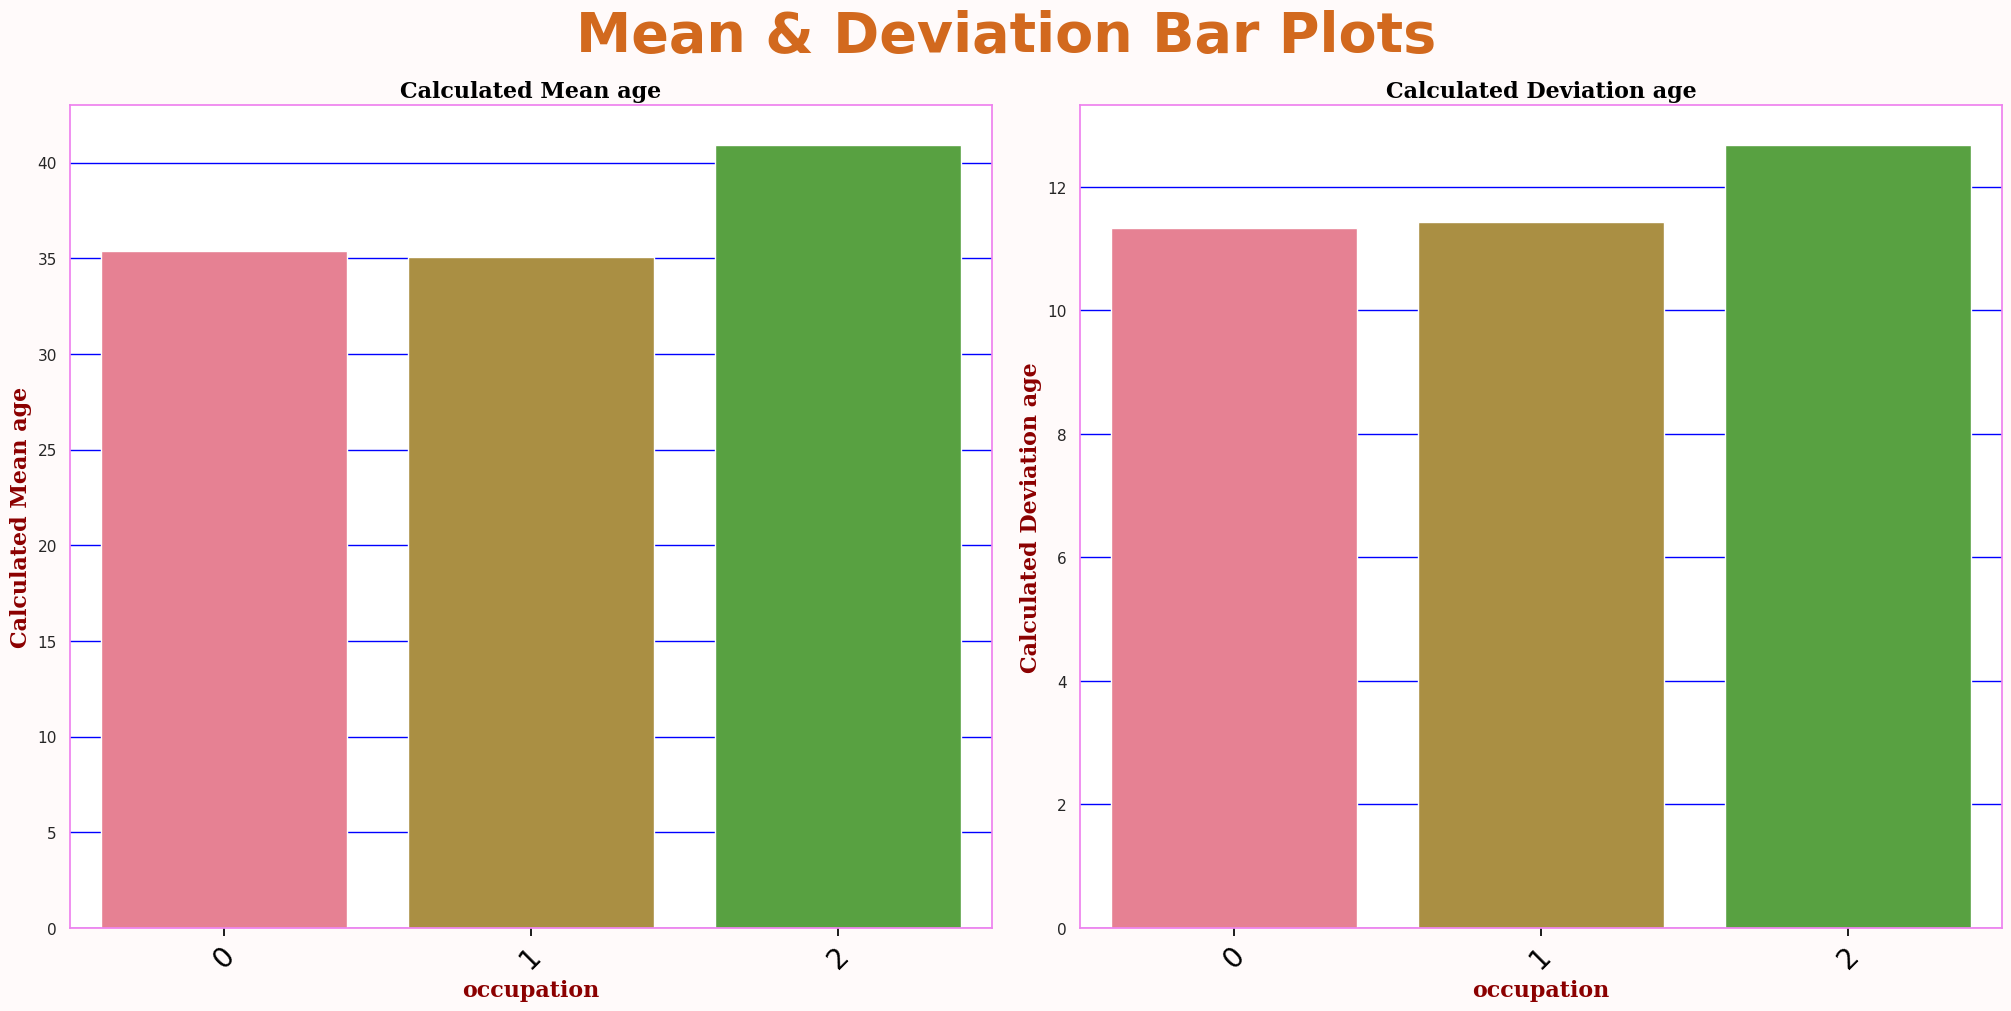

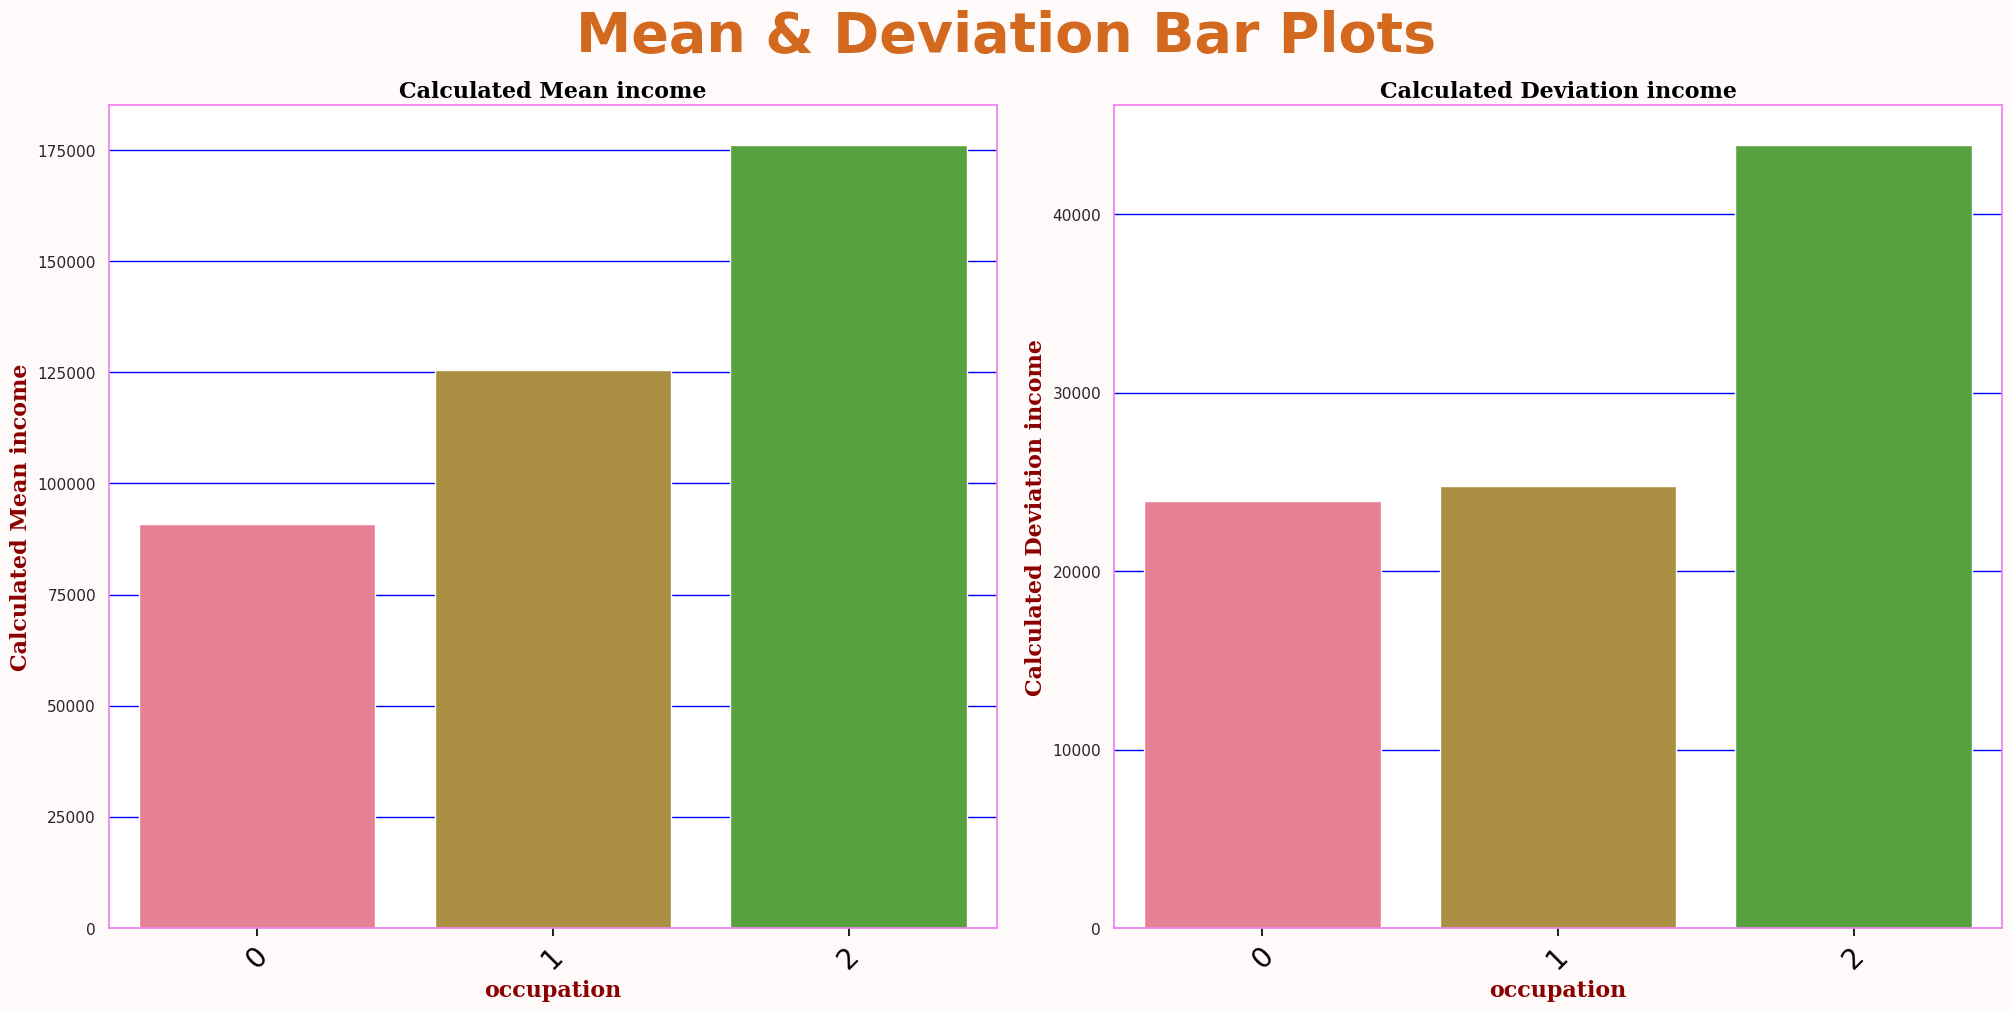

In [37]:
for value in num_list:
    plotting_bar(x=value,group='occupation')

In [38]:
print("age")
for value in eda.occupation.sort_values().unique().to_list():
    cond = eda.occupation == value
    print(eda[cond].age.skew())

print()
print("income")
for value in eda.occupation.sort_values().unique().to_list():
    cond = eda.occupation == value
    print(eda[cond].income.skew())

age
0.9727716442605198
1.019541804530988
1.0077654940285867

income
0.6300092771563237
1.488324165562003
0.882356998311132


**Observations**
- Class 2 is highest in mean and std for age
- class 2 is also highest in mean and std for income; not surprised because class 2 are;
    + management 
    + self-employed
    + highly qualified employee 
    + officer

- In both age and income, there is some level of high skewness

**Looking into settlement_size**

In [39]:
settlement_size = summary_stats(column=num_list[0],group=cats[4])
settlement_size

,settlement_size,total_age,average_age,deviation_age,range_age,skewness_level_age
0,0,33920.0,34.297270,10.709856,56,1.113176
1,1,20443.0,37.579044,12.853087,58,0.884697
2,2,17455.0,37.376874,11.939554,52,0.870938


In [40]:
settlement_size = summary_stats(column=num_list[1],group=cats[4])
settlement_size

,settlement_size,total_income,average_income,deviation_income,range_income,skewness_level_income
0,0,99950108,101061.787664,26505.919898,183487,0.547405
1,1,74762107,137430.343750,34579.105619,226093,1.473514
2,2,67196623,143889.985011,40781.263863,239877,1.426990


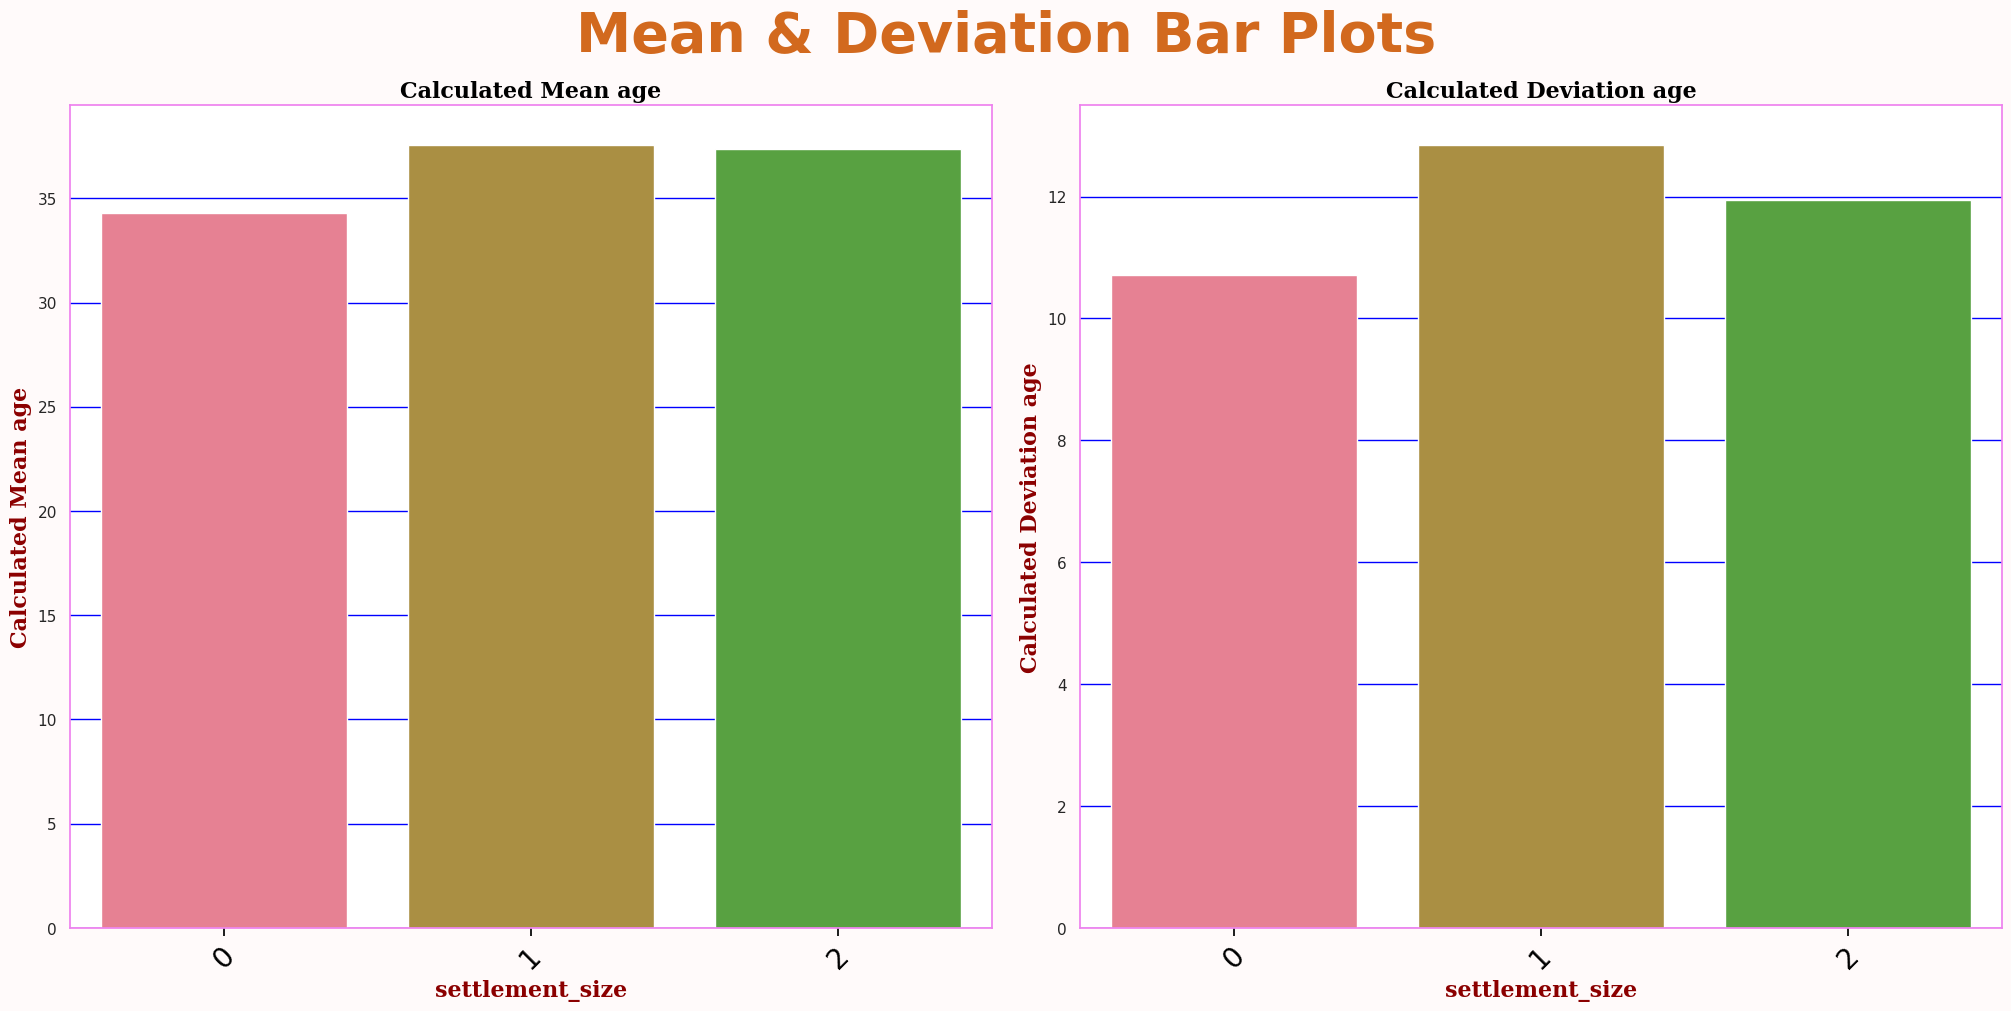

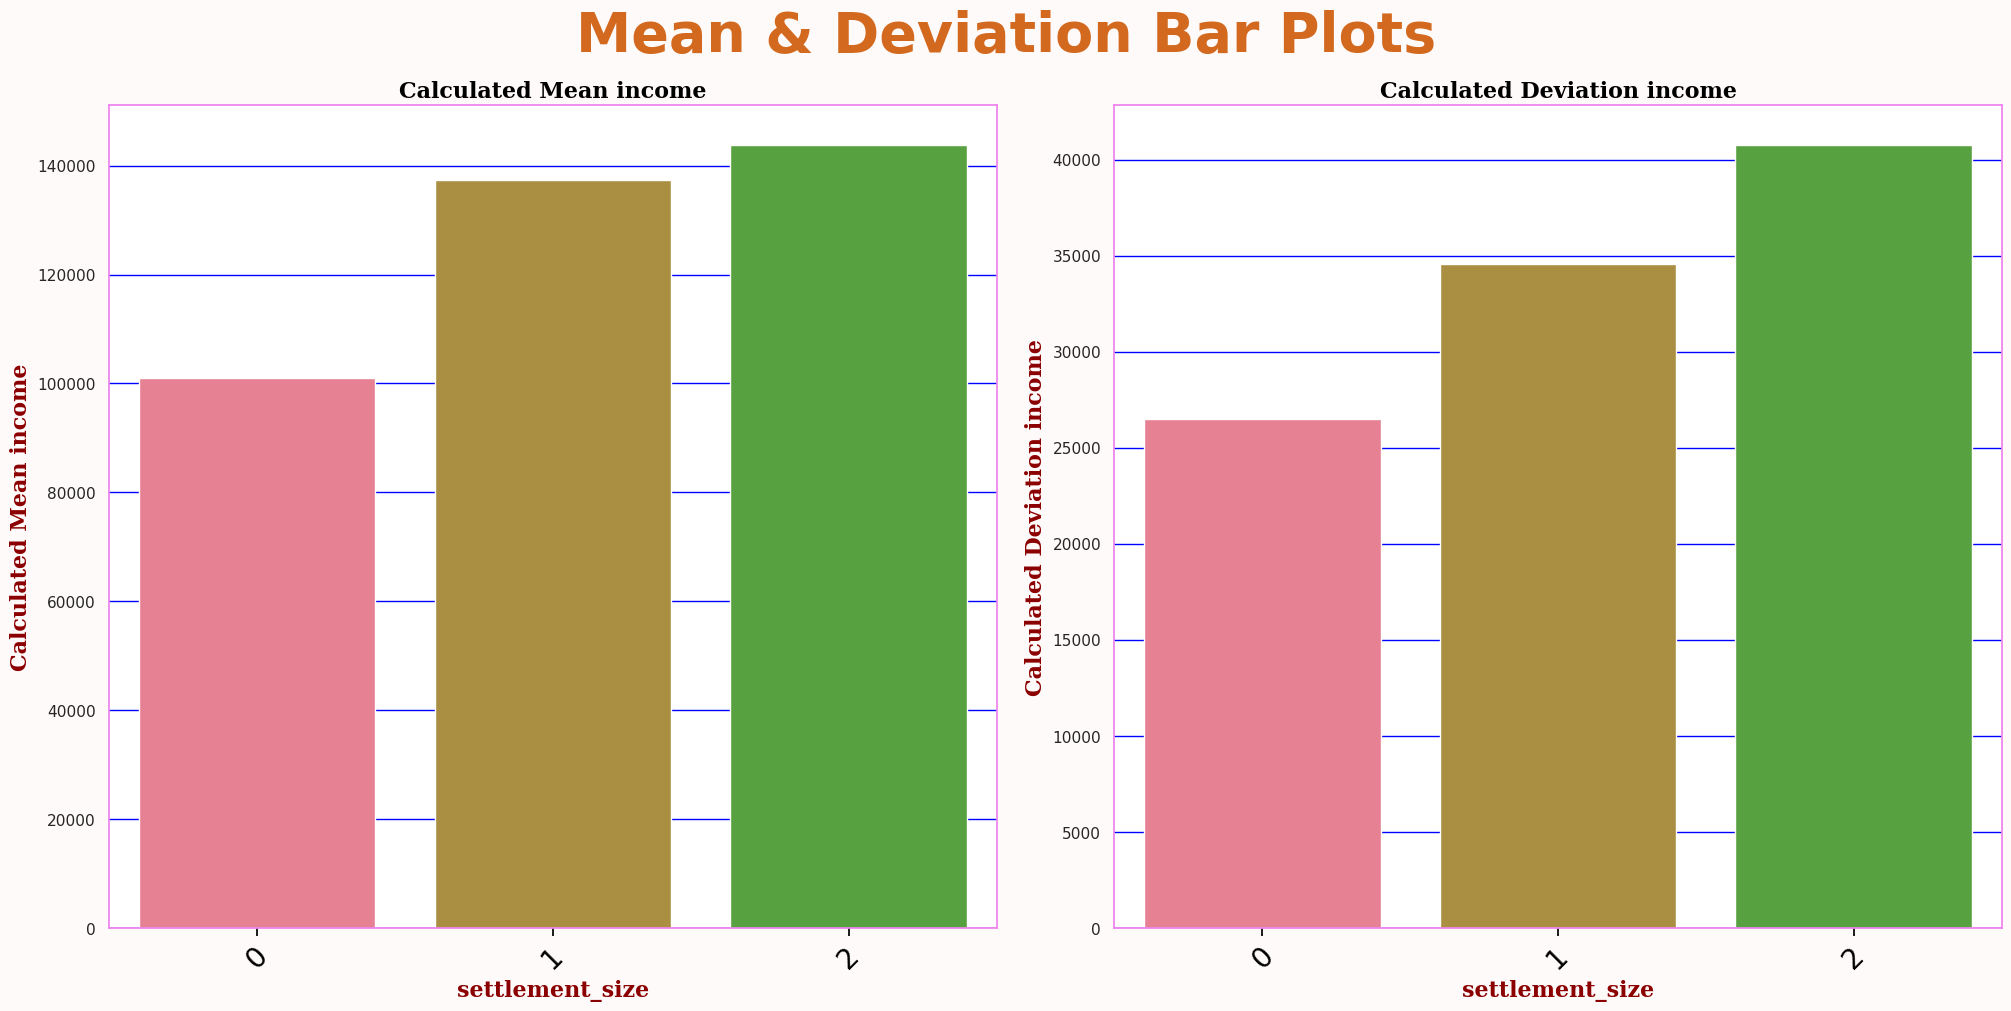

In [41]:
for value in num_list:
    plotting_bar(x=value,group='settlement_size')

In [42]:
# print("age")
# for value in eda.settlement_size.sort_values().unique().to_list():
#     cond = eda.settlement_size == value
#     print(eda[cond].age.skew())

# print()
# print("income")
# for value in eda.settlement_size.sort_values().unique().to_list():
#     cond = eda.settlement_size == value
#     print(eda[cond].income.skew())

**Observations**
- settlement size 1 has the highest mean and std (high spread) age
- settlement size 2 has the highest mean and std (high spread) income
- age and income have high level of skewness.

In [43]:
def plotting_count(x:str,hue:str):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')

        ordering = eda[x].value_counts()
        # my_palette = sns.color_palette('bright')
        sns.countplot(data=eda, x=x, hue=hue,)
        if x in cat:
            # ax.set_xticklabels(['female','male'],rotation=45,fontsize=20)
            ax.set_title(f'Count plot of number of {x} with {hue}',fontdict=font_title)
            ax.set_xlabel(f"{x}", fontdict=font_label)
            ax.set_ylabel("Count", fontdict=font_label)
        else:
            # ax.set_xticklabels(["A","B","C","D"],rotation=45,fontsize=20)
            ax.set_title(f'Count plot of number of {x} with {hue}',fontdict=font_title)
            ax.set_xlabel(f"{x}", fontdict=font_label)
            ax.set_ylabel("Count", fontdict=font_label)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

In [44]:
# cat
# ['sex', 'marital_status', 
# 'education', 'occupation', 'settlement_size']

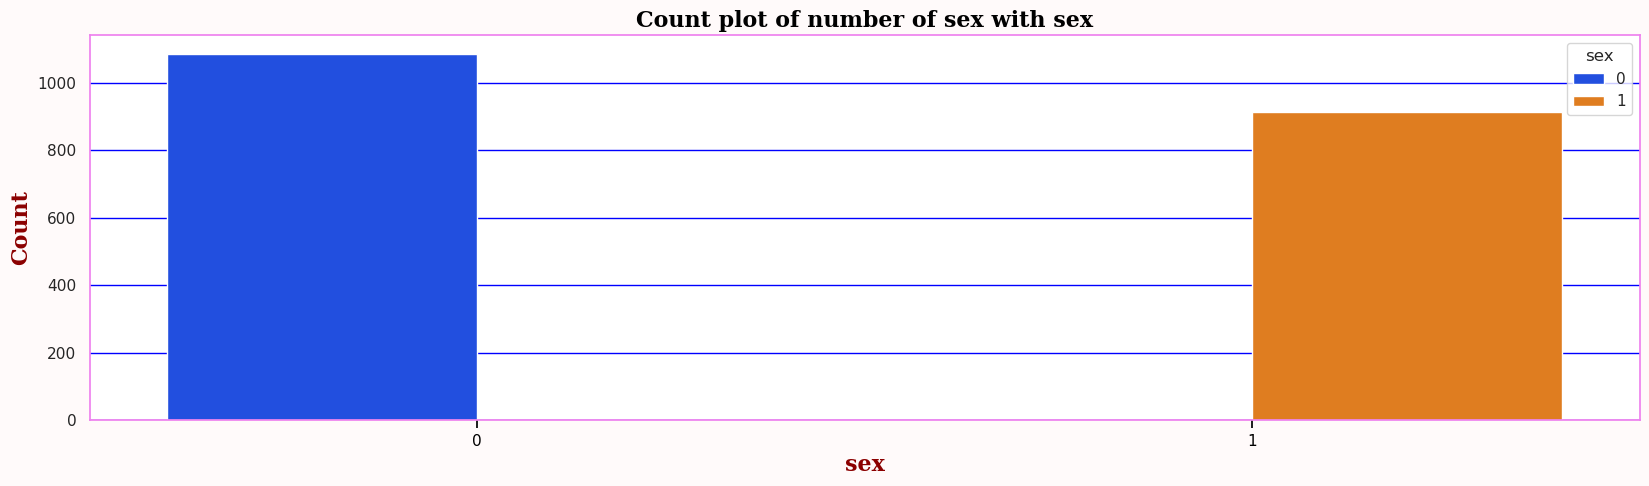

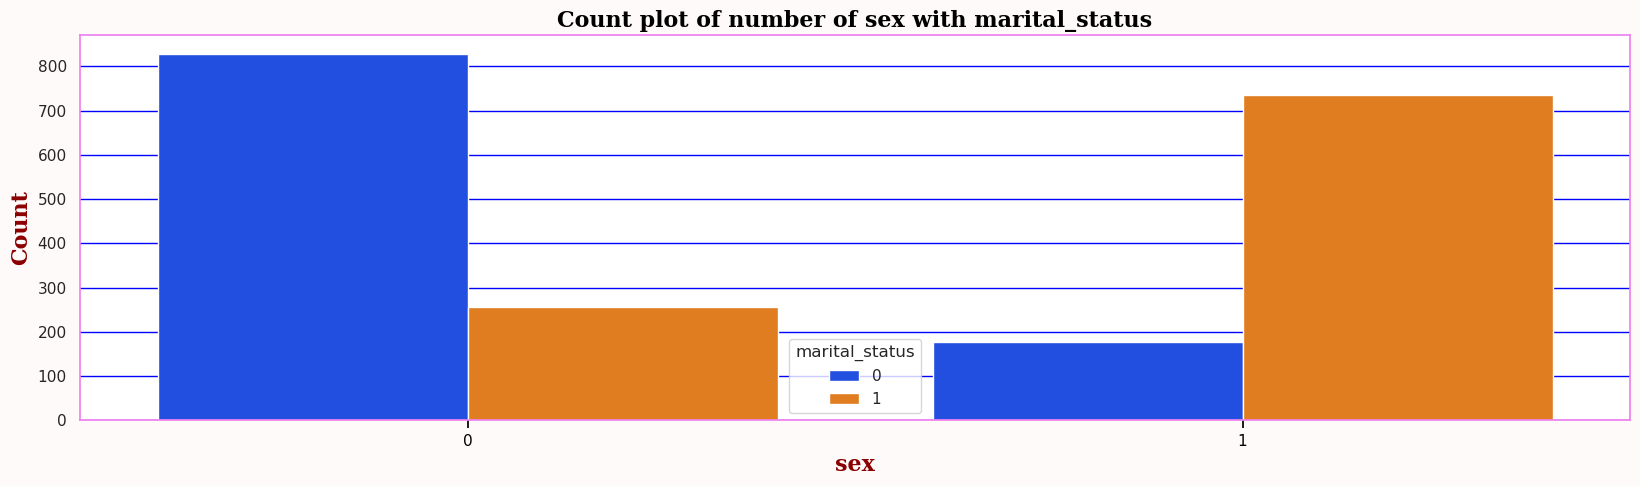

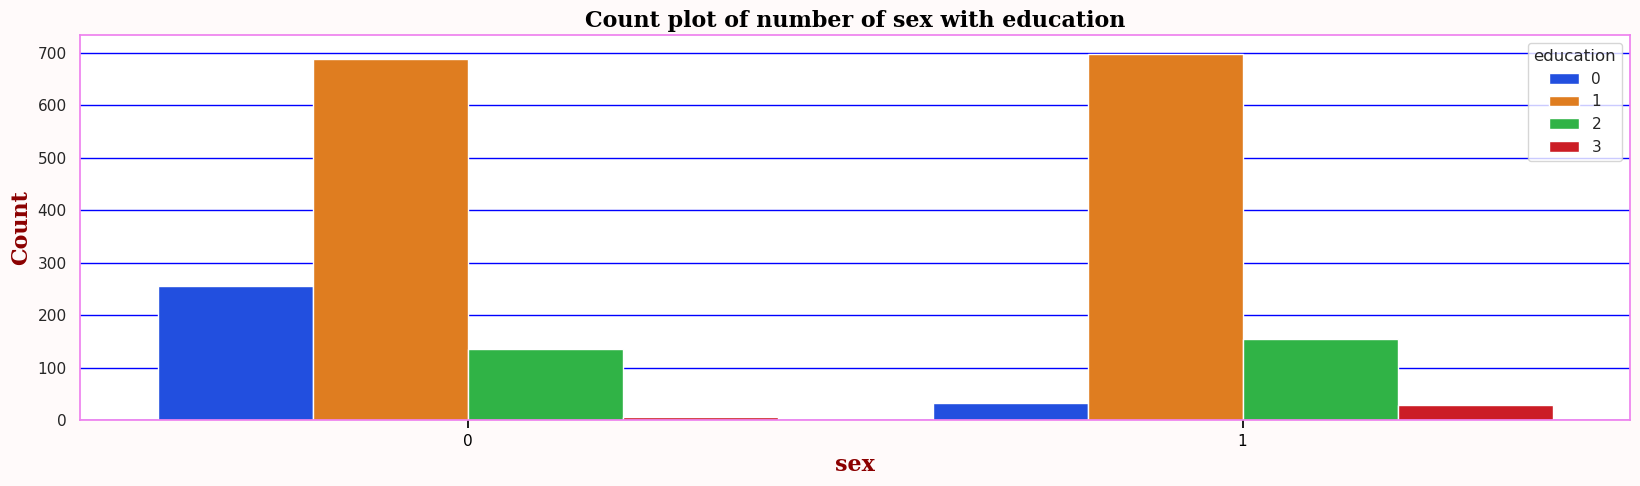

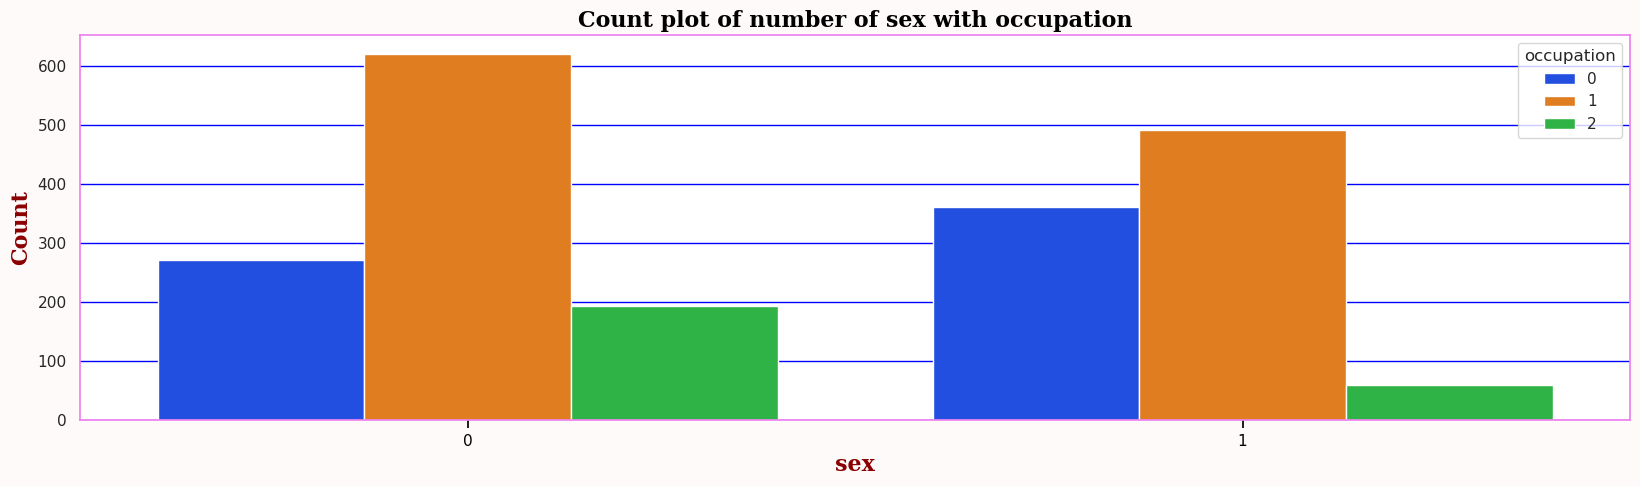

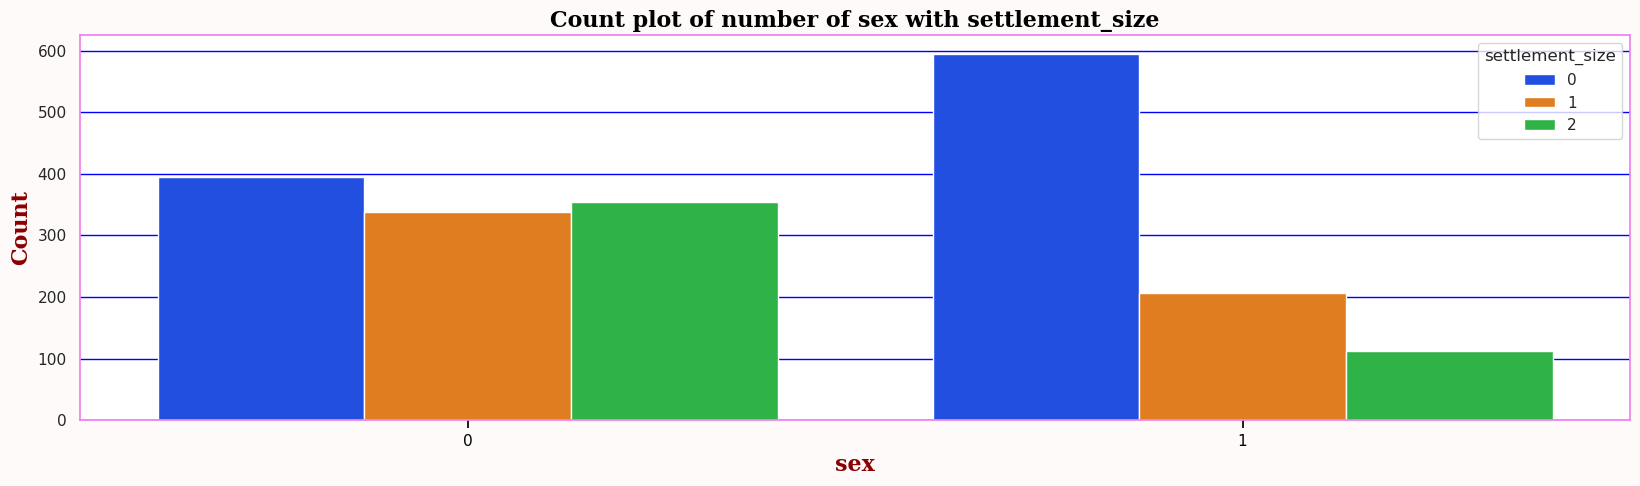

In [45]:
# Will be looking into sex as a group
for x in cat:
    plotting_count('sex',x)

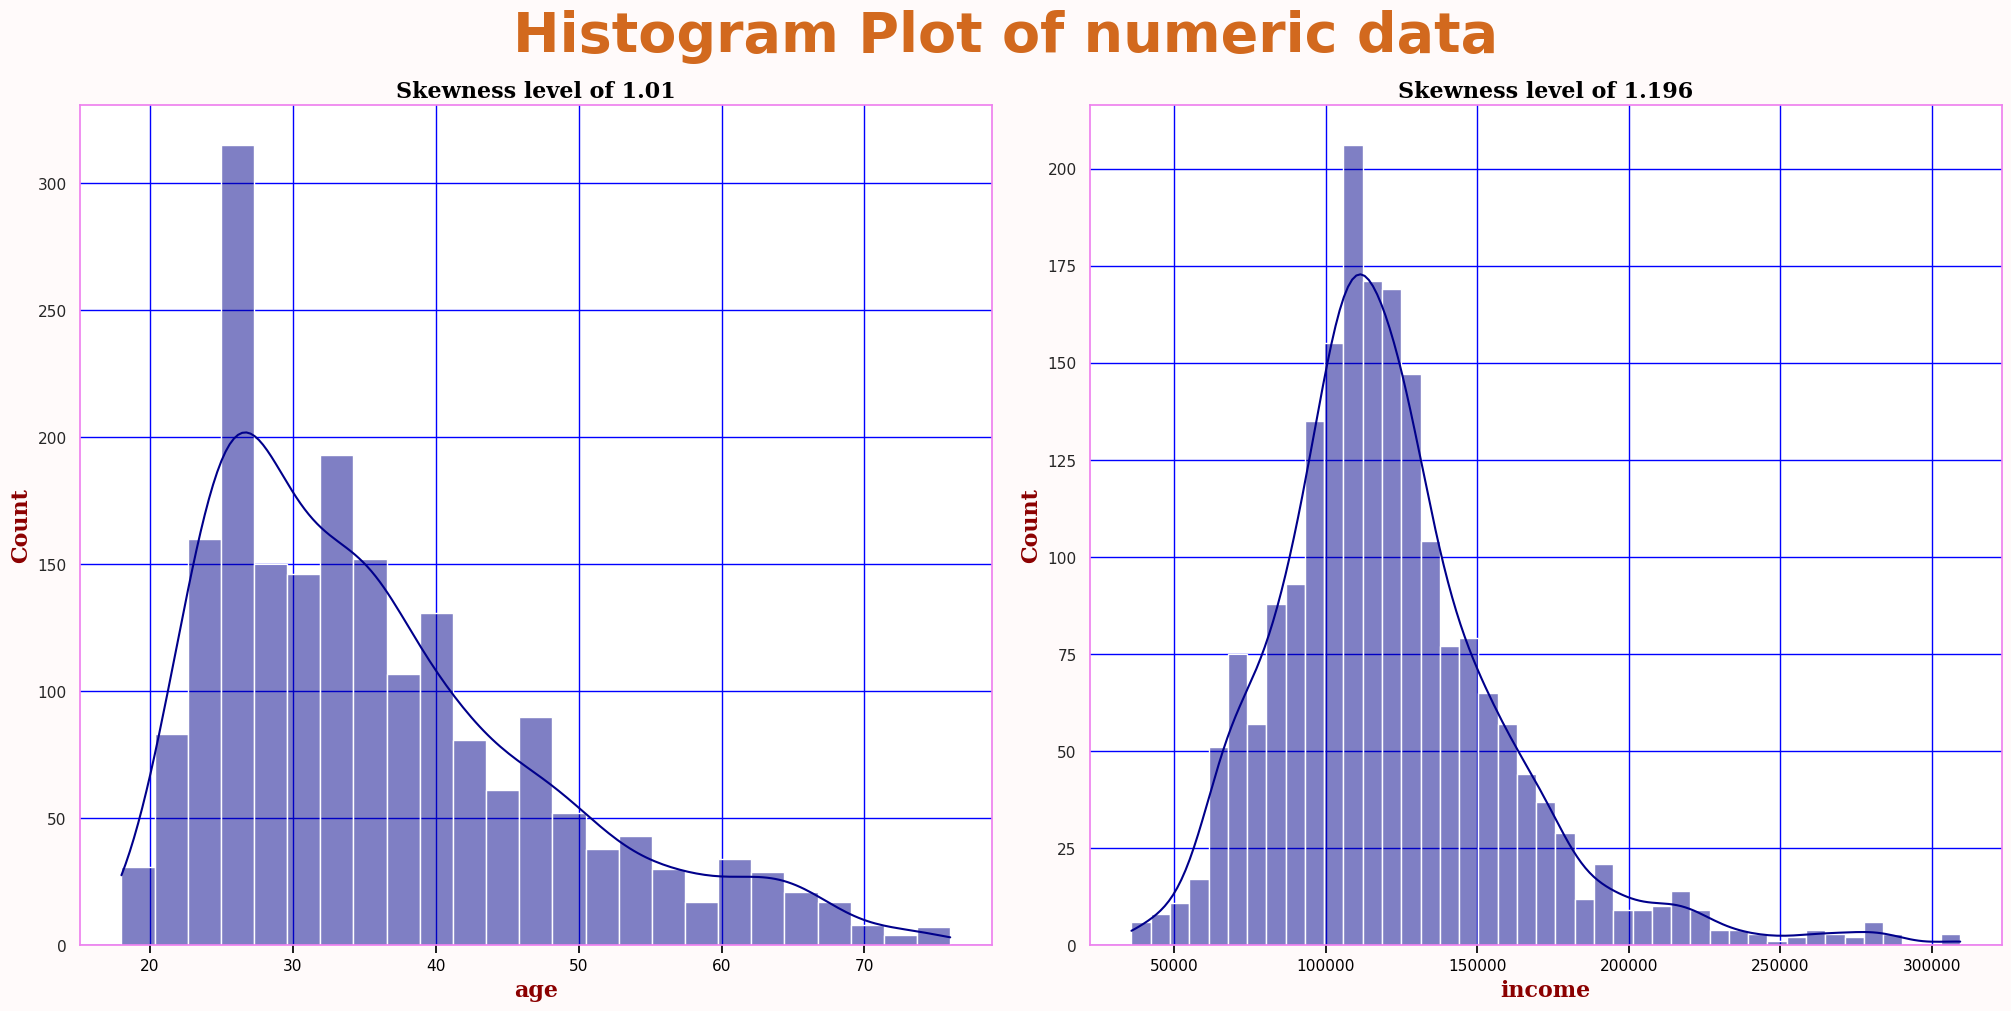

In [46]:
fig,ax = plt.subplots(1,2,constrained_layout=True,figsize=(20,10))
ax = ax.ravel()
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index,value in enumerate(num_list):
    sns.histplot(data=eda,x=value,ax=ax[index],kde=True,color="darkblue")
    ax[index].set_title(f'Skewness level of {np.around(eda[value].skew(axis=0),3)}',fontdict=font_title)
    ax[index].set_xlabel(f"{value}", fontdict=font_label)
    ax[index].set_ylabel("Count", fontdict=font_label)
    fig.suptitle(f"Histogram Plot of numeric data",fontdict=font_fig,fontsize=40,fontweight='bold')

In [47]:
len(cat)

5

In [48]:
# # fig,ax = plt.subplots(2,3,figsize=(20,10),constrained_layout=True)
# # print(ax.shape)
# # print(ax.ravel().shape)

In [106]:
def box_plot(x:str,category:list,data:pd.DataFrame):
    try:
        fig,ax = plt.subplots(2,3,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        ax = ax.ravel() 

        for index,value in enumerate(category):
            sns.boxplot(data=data,x=x,y=value,hue=value,ax=ax[index])
            ax[index].set_title(f'Box plot of {x} vs {value}',fontdict=font_title)
            ax[index].set_xlabel(f"{x}", fontdict=font_label)
            ax[index].set_ylabel(f"{value}", fontdict=font_label)
            fig.suptitle("Box plots",fontdict=font_fig,fontsize=40,fontweight='bold')
            plt.legend(loc='center right')
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

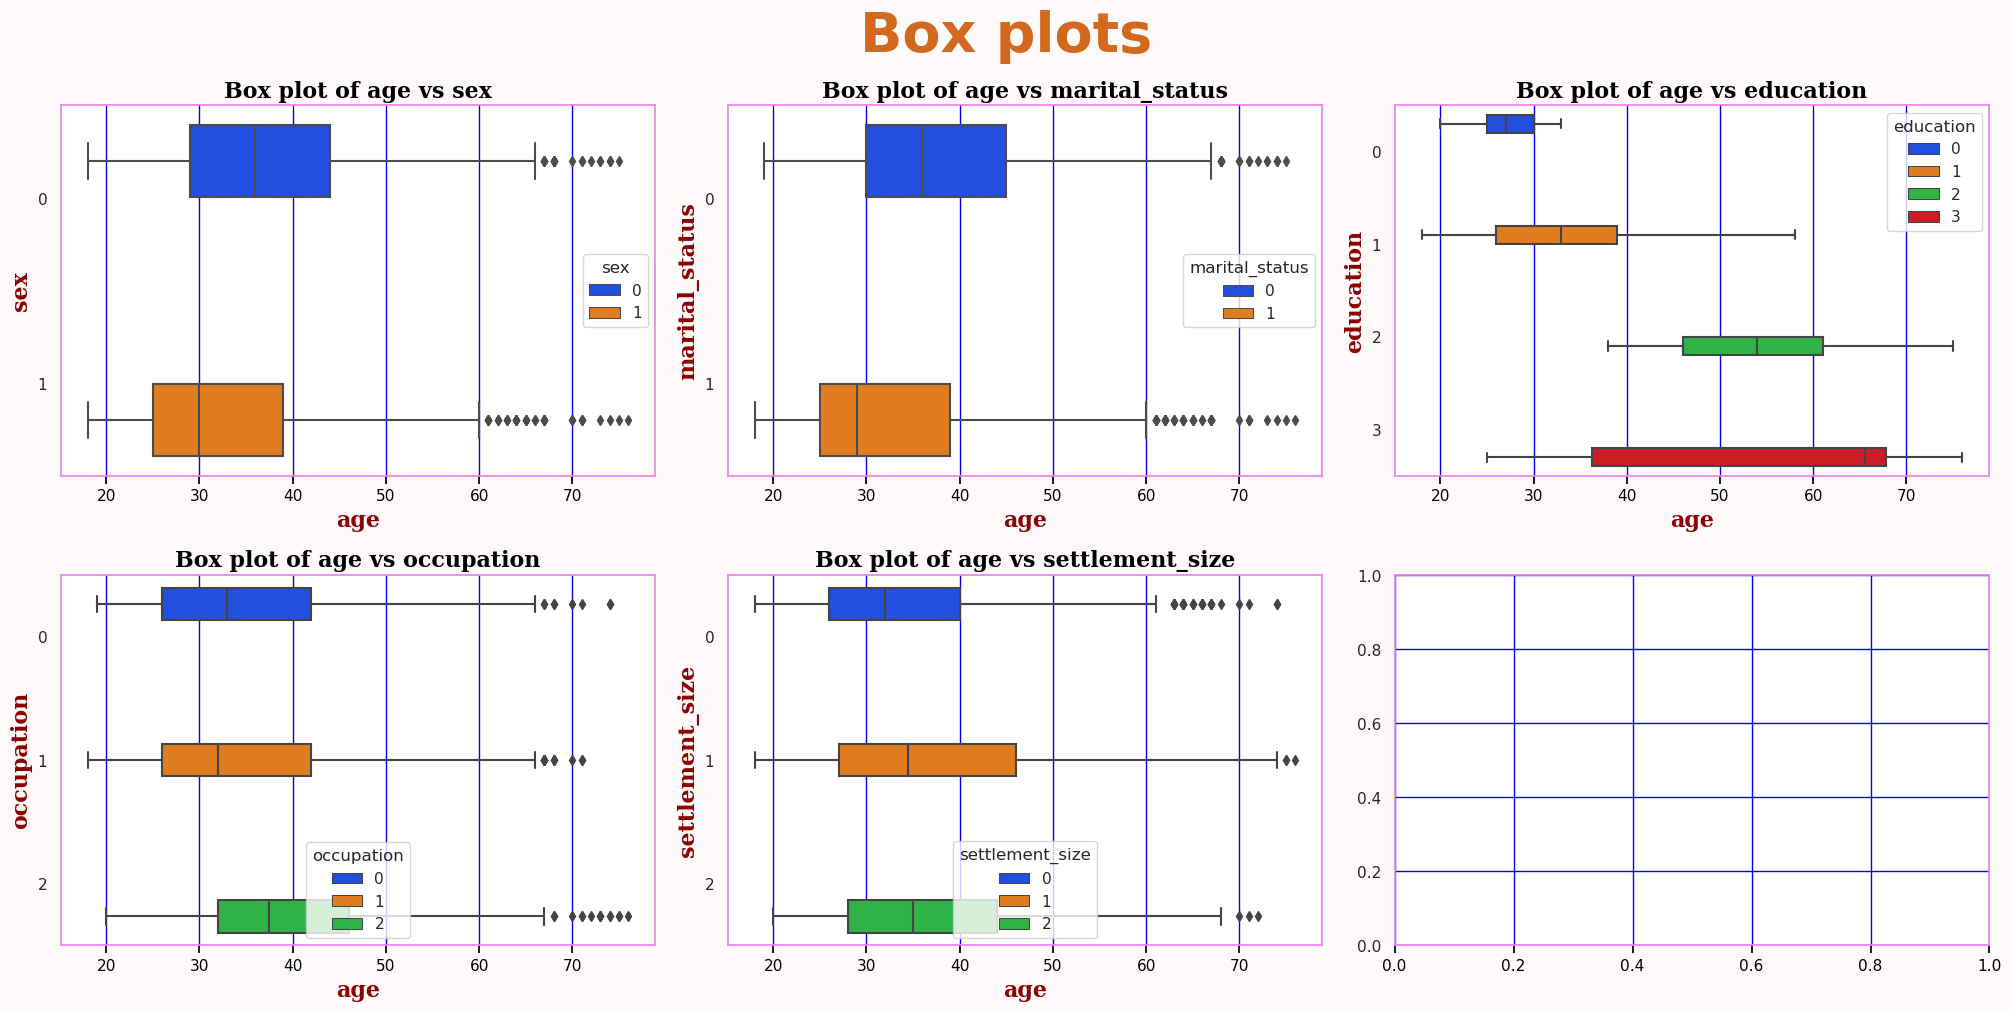

In [50]:
box_plot('age',cat,eda)

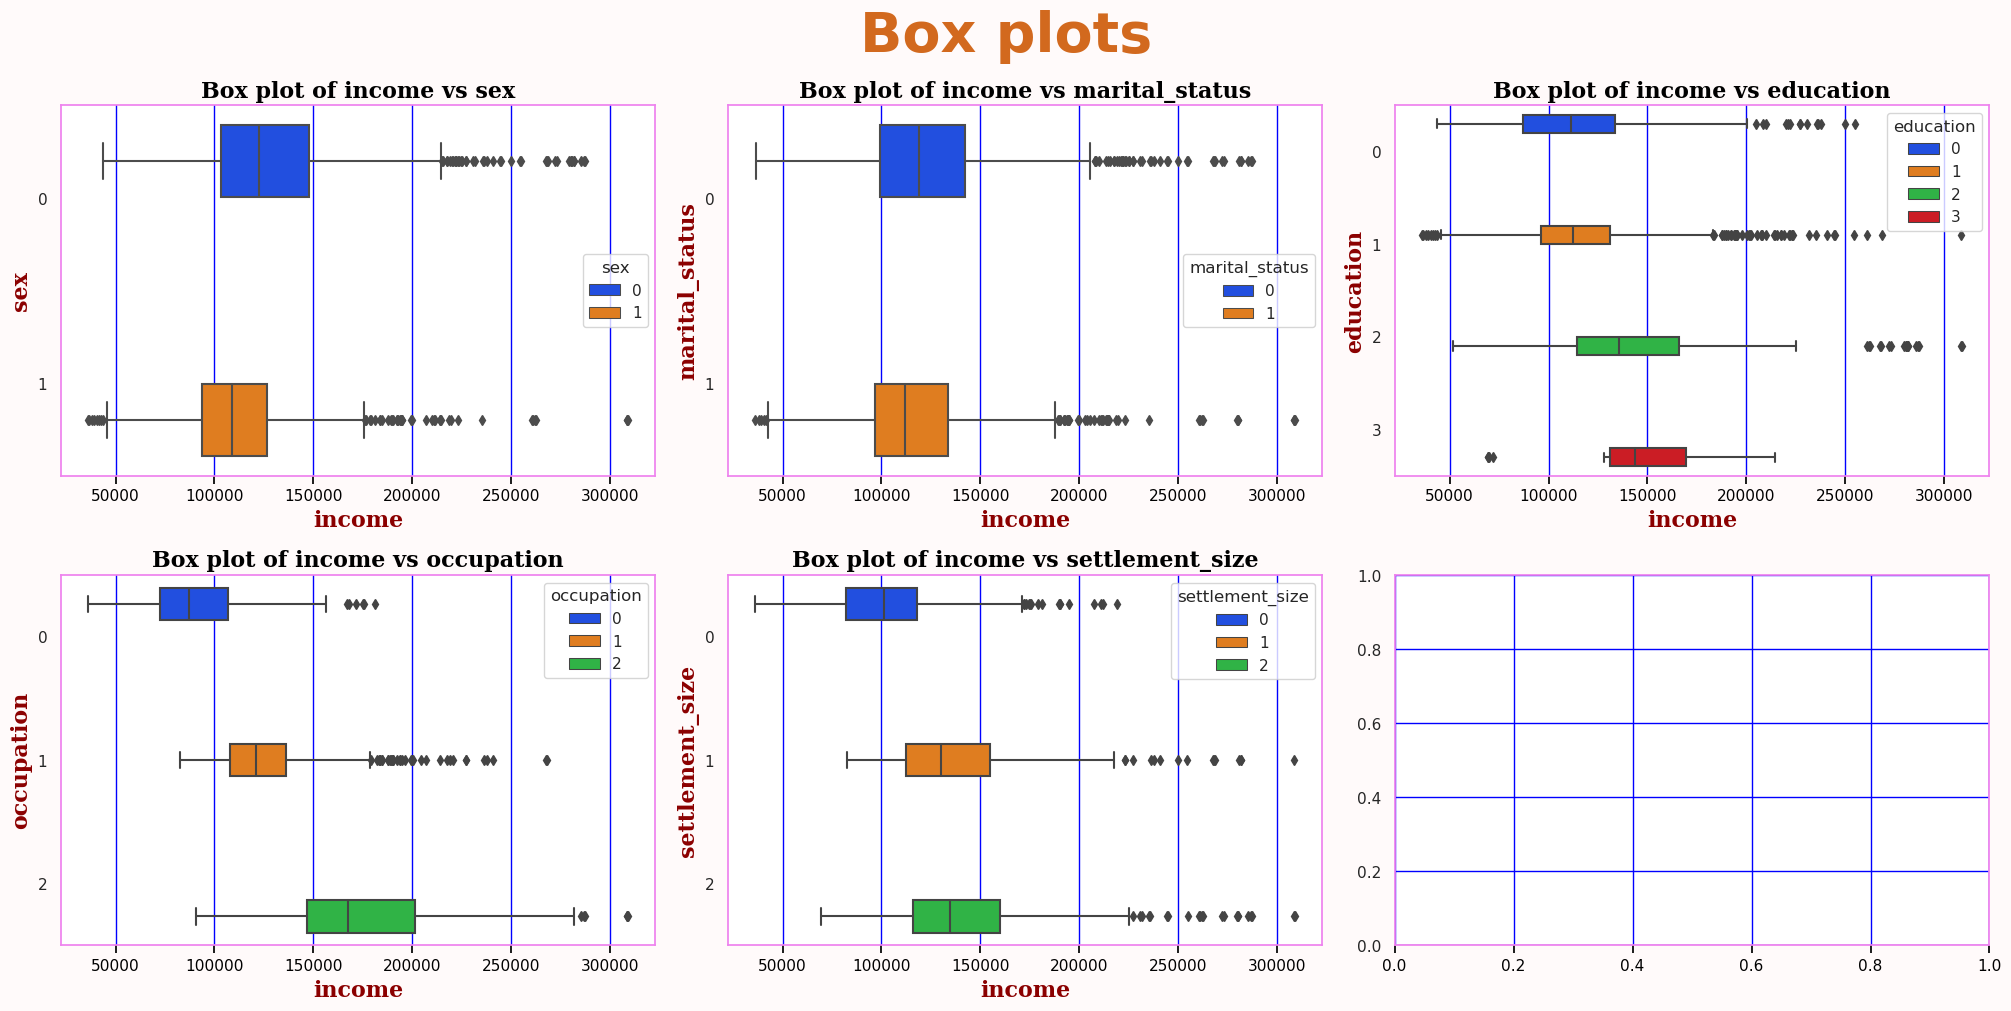

In [51]:
box_plot('income',cat,eda)

## **Clustering**

In [52]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Clustering algo
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Evaluation
from yellowbrick.cluster import KElbowVisualizer

In [53]:
clustering = eda.copy()

In [54]:
to_be_transformed = ['age','income']

In [55]:
columns = eda.columns.to_list()

In [56]:
indexes = [columns.index(column) for column in to_be_transformed]
print(indexes)

[2, 4]


In [57]:
# Using column transformation with scaling
column_transformer = ColumnTransformer(
    transformers=[
        ('standard_scaler',StandardScaler(),indexes)
    ], remainder="passthrough"
)

In [58]:
scaled = column_transformer.fit_transform(clustering)

In [59]:
clustering[:2]

,sex,marital_status,age,education,income,occupation,settlement_size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2


In [60]:
scaled[:2] 
# Once the transformation is applied, 
# the chosen indices are shifted forward.
# Thereby rearranging the data, 
# manual inspection would be needed to convert to 
# dataframe if desired

array([[ 2.65361447,  0.09752361,  0.        ,  0.        ,  2.        ,
         1.        ,  2.        ],
       [-1.18713209,  0.78265438,  1.        ,  1.        ,  1.        ,
         1.        ,  2.        ]])

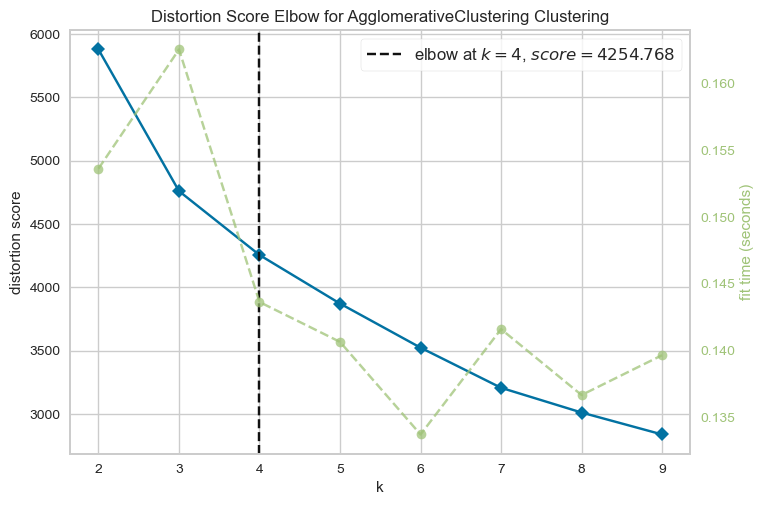

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
agg = AgglomerativeClustering()
visualiser = KElbowVisualizer(agg,k=(2,10),metric="distortion")
visualiser.fit(scaled)
visualiser.show()

In [62]:
k_data = {
    "k_value": visualiser.k_values_,
    "k_scores":visualiser.k_scores_
}
Elbow_values = pd.DataFrame(k_data)
Elbow_values

,k_value,k_scores
0,2,5876.550594
1,3,4759.215475
2,4,4254.767819
3,5,3871.466935
4,6,3523.527618
5,7,3206.905150
6,8,3011.701593
7,9,2838.581438


In [63]:
# Would use a k value of 4
my_pipe = Pipeline(
    [
        ("my_column_transformer",column_transformer),
        ("agg",AgglomerativeClustering(n_clusters=4))
    ]
)

In [64]:
result = my_pipe.fit(clustering)

In [65]:
my_clusters = result.named_steps['agg']
scaled_data = result.named_steps['my_column_transformer'].transform(clustering)

In [66]:
scaled_data[:2]
# 7 columns

array([[ 2.65361447,  0.09752361,  0.        ,  0.        ,  2.        ,
         1.        ,  2.        ],
       [-1.18713209,  0.78265438,  1.        ,  1.        ,  1.        ,
         1.        ,  2.        ]])

In [67]:
my_clusters.labels_

array([2, 1, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
# Computing cluster centers by mean
cluster_centers = []
for cluster_label in np.unique(my_clusters.labels_):
    cluster_points = scaled_data[my_clusters.labels_ == cluster_label ]
    center = np.mean(cluster_points,axis=0)
    cluster_centers.append(center)

In [69]:
cluster_centers = np.array(cluster_centers)
cluster_centers

array([[-0.52246353, -0.62805848,  0.64971751,  0.62033898,  0.84971751,
         0.45084746,  0.14011299],
       [-0.10193467,  0.29716587,  0.19160839,  0.3020979 ,  0.81258741,
         1.14545455,  1.35244755],
       [ 1.5367348 ,  0.40623614,  0.59815951,  0.66871166,  2.05214724,
         0.8190184 ,  0.79754601],
       [ 0.46335089,  2.85034029,  0.09459459,  0.13513514,  1.        ,
         1.83783784,  1.71621622]])

In [70]:
def cluster_plots(x:int,y:int,cluster_data):
    sns.set_theme(rc=rc,style='darkgrid')
    # data points
    sns.scatterplot(x= cluster_data[:,x],
                    y= cluster_data[:,y],
                    palette='husl',
                    hue=my_clusters.labels_)
    
    # cluster centers
    sns.scatterplot(cluster_centers[:,x],
                    cluster_centers[:,y],
                    markers='X',s=80,label="centroids",
                    color="red")

    # Styling
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Cluster plots",fontdict=font_title)
    plt.legend(loc='upper left')

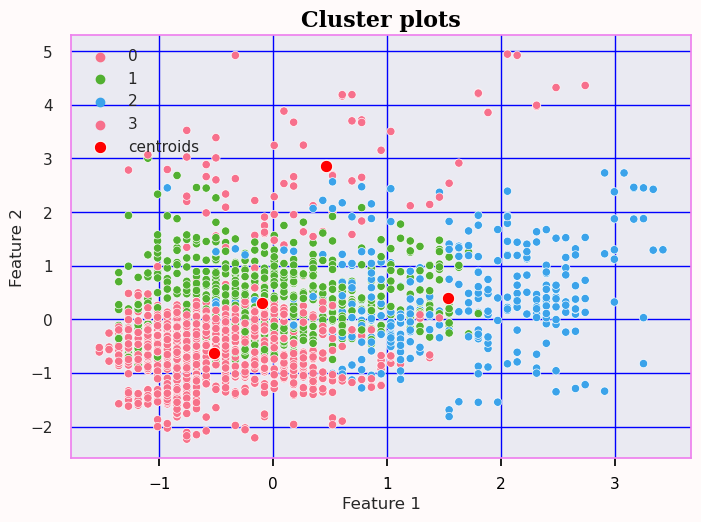

In [71]:
cluster_plots(0,1,scaled_data)

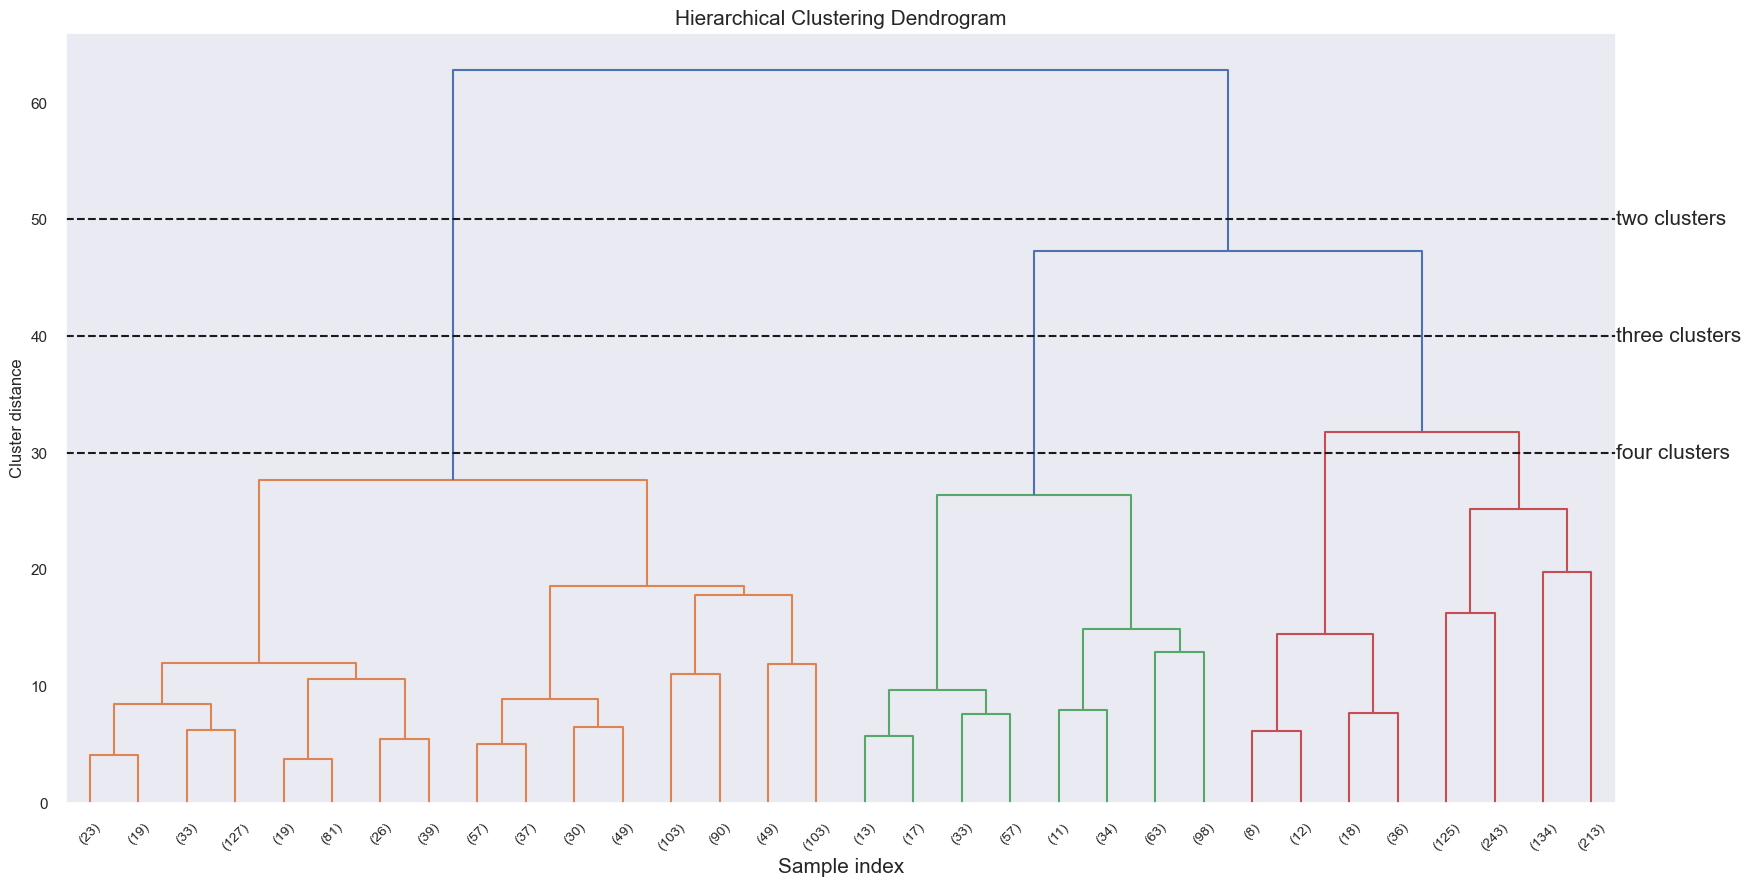

In [72]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples =len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0 
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)

    # plot corresponding dendrogram
    dendrogram(linkage_matrix,**kwargs)


sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize=(20,10))
# Setting the algorithm
ac = AgglomerativeClustering(distance_threshold =0,n_clusters=None)
agg = ac.fit(scaled_data)
plt.title("Hierarchical Clustering Dendrogram",fontdict={'size':15})
# plot the top 4 levels
plot_dendrogram(agg,truncate_mode='level',p=4)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [50, 50], '--', c='k')
ax.plot(bounds, [40,40], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1],50,'two clusters',va ='center',fontdict={'size':15})
ax.text(bounds[1],40,'three clusters', va ='center',fontdict={'size':15})
ax.text(bounds[1],30,'four clusters', va ='center',fontdict={'size':15})
# plt.xlabel("Number of points in node(or index of point if no parenthesis ).")
plt.xlabel("Sample index",fontdict={'size':15})
# plt.xticks(rotation=45, ha="right",fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Cluster distance")
plt.show()

In [73]:
# def threed_cluster_plots(x:int,y:int,z:int, cluster_data):
#     fig = px.scatter_3d(cluster_data,
#                         x= cluster_data[:,x],
#                         y= cluster_data[:,y],
#                         z=cluster_data[:,z],
#                         opacity=1,
#                         size_max=18,
#                         symbol=my_clusters.labels_,
#                         color=my_clusters.labels_)

#     fig.update_layout(scene = dict(
#                         xaxis_title="Feature 1",
#                         yaxis_title="Feature 2",
#                         zaxis_title="Feature 3"
#                         ),
#                         width=700,
#                         margin=dict(r=20, b=10, l=10, t=10)
#                         )

#     # Hide colorbar axis
#     fig.update_layout(coloraxis_showscale=False)

#     fig.show()

# threed_cluster_plots(0,1,3,scaled_data)

## **Analysing the cluster labels**

In [74]:
clustering['cluster_labels'] = my_clusters.labels_
clustering.head(5)

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [75]:
clustering['cluster_labels'] = clustering.cluster_labels.astype("category")
clustering.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              2000 non-null   category
 1   marital_status   2000 non-null   category
 2   age              2000 non-null   int8    
 3   education        2000 non-null   category
 4   income           2000 non-null   int32   
 5   occupation       2000 non-null   category
 6   settlement_size  2000 non-null   category
 7   cluster_labels   2000 non-null   category
dtypes: category(6), int32(1), int8(1)
memory usage: 22.5 KB


In [76]:
cat2 = clustering.select_dtypes(include=pd.CategoricalDtype)

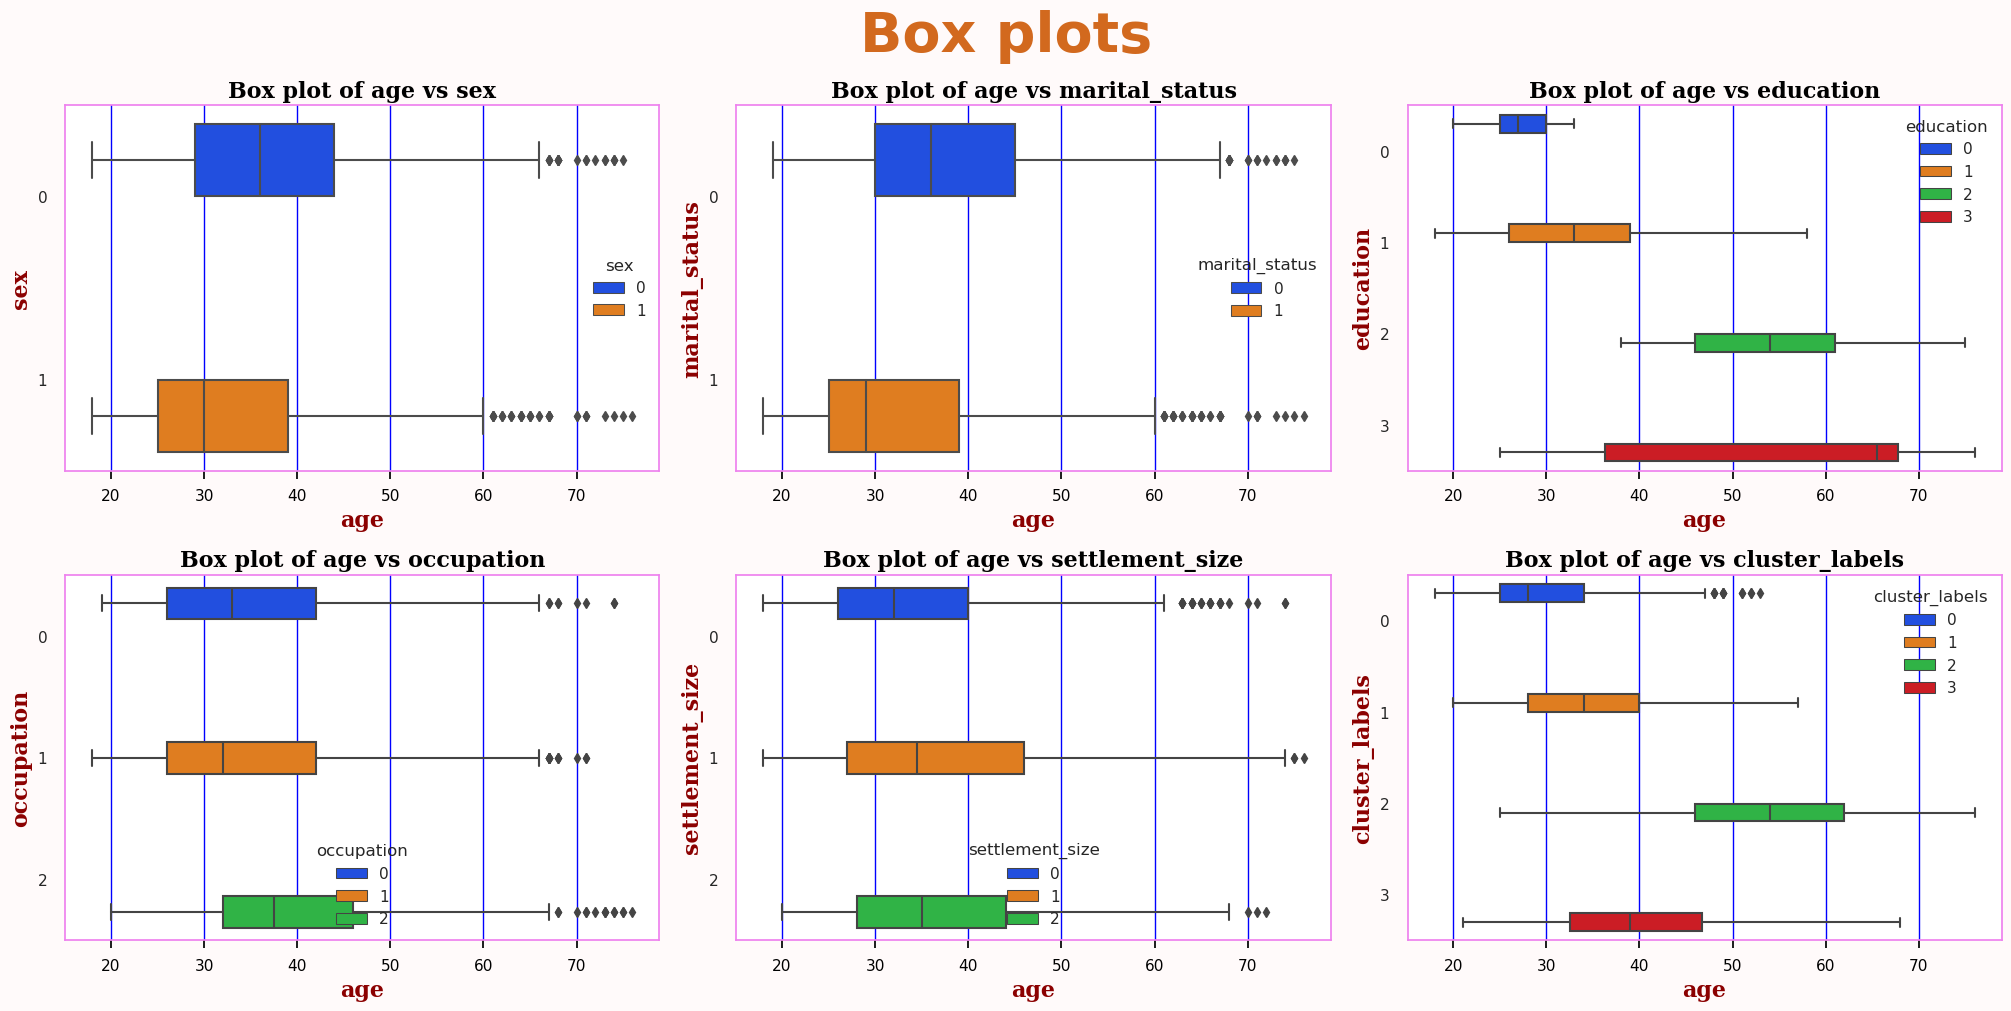

In [79]:
box_plot('age',cat2,clustering)

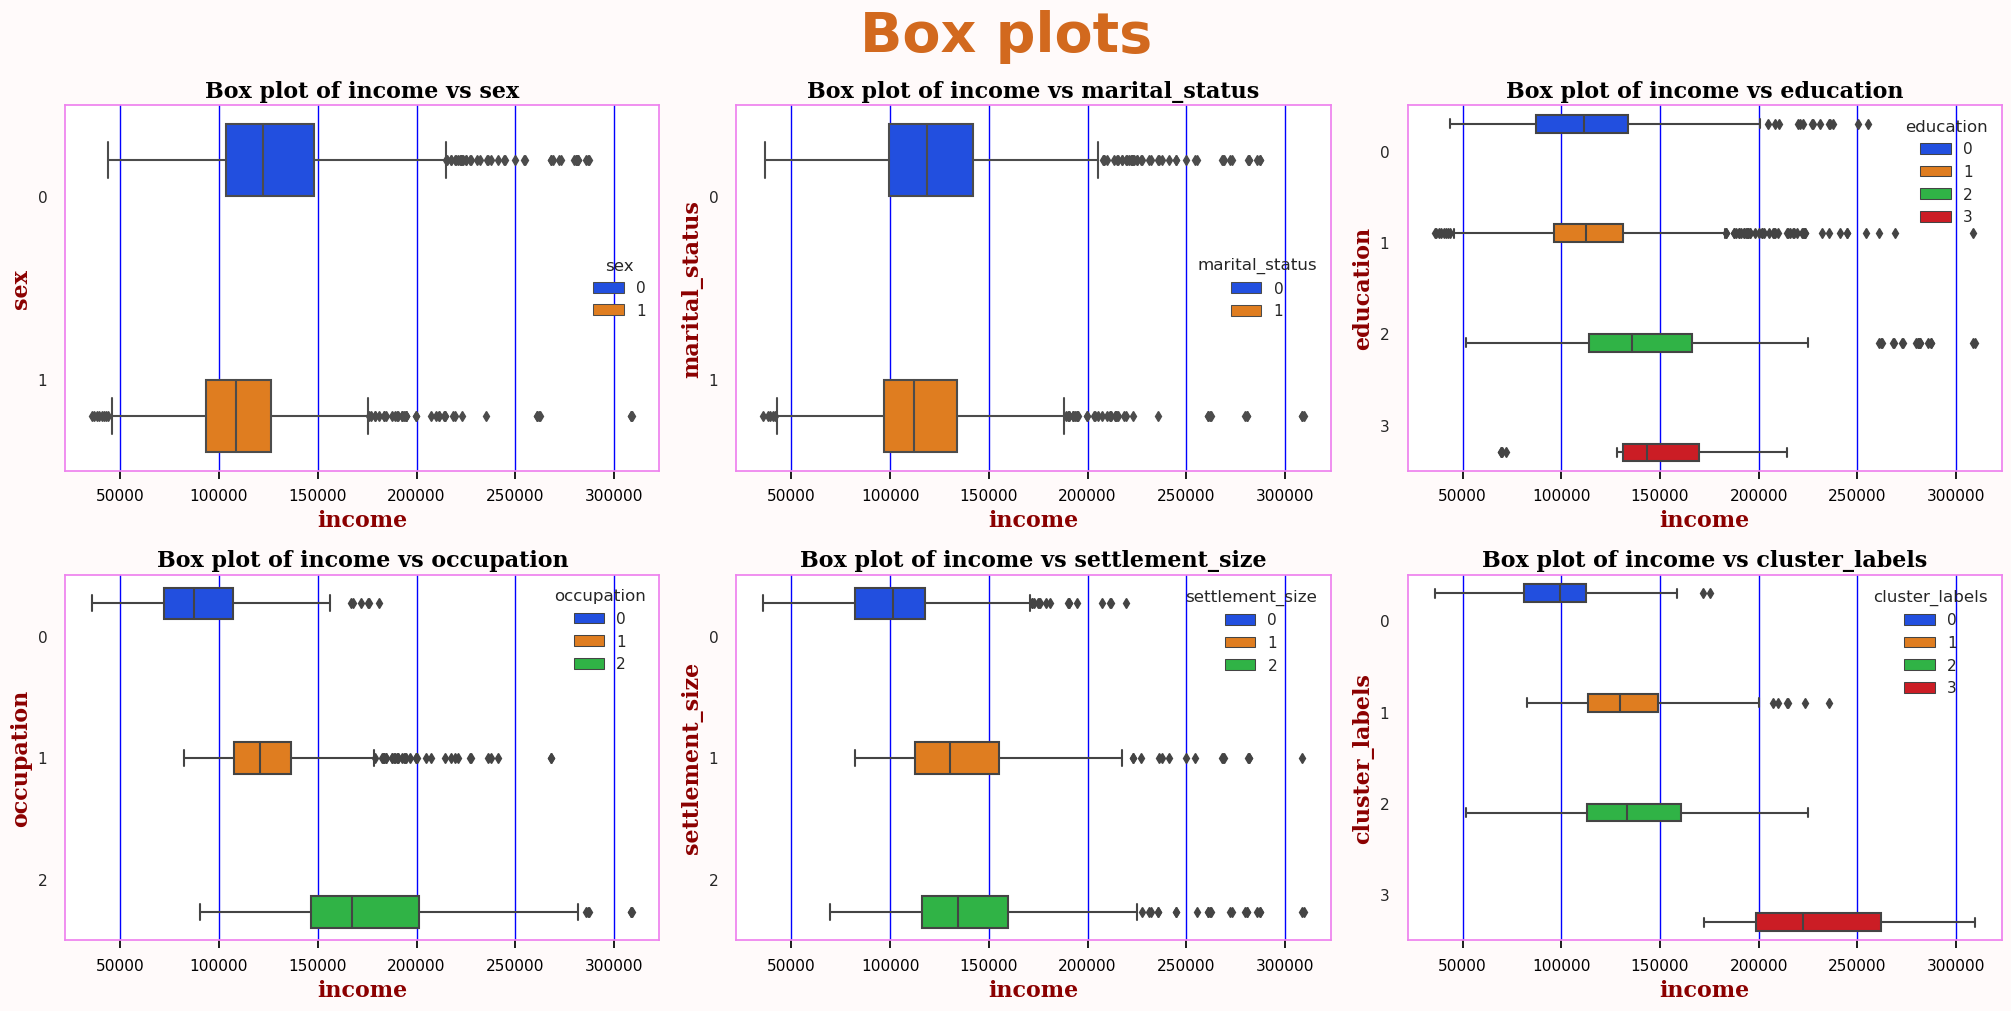

In [78]:
box_plot('income',cat2,clustering)

In [80]:
cluster_anal = clustering.copy()

In [82]:
cluster_anal.head()

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [89]:
# ['sex', 'marital_status', 
# 'education', 'occupation', 'settlement_size']
mappings  = {
    'sex':{
        0: 'male',
        1:'female'
    },

    'marital_status':{
        0:'single',1:"non_single"
    },
    'education':{
        0:'unknown',
        1:"high_school",
        2:"university",
        3:"graduate_school"
    },
    "occupation":{
        0:'unemployed',
        1:"skilled",
        2:'management'
    },
    "settlement_size":{
        0:'small_city',
        1:"mid_size_city",
        2:"big_city"
    }
}

In [93]:
mappings['education']

{0: 'unknown', 1: 'high_school', 2: 'university', 3: 'graduate_school'}

In [94]:
for col in list(mappings.keys()):
    cluster_anal[col] = cluster_anal[col].map(mappings[col])

In [95]:
cluster_anal

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
0,male,single,67,university,124670,skilled,big_city,2
1,female,non_single,22,high_school,150773,skilled,big_city,1
2,male,single,49,high_school,89210,unemployed,small_city,0
3,male,single,45,high_school,171565,skilled,mid_size_city,1
4,male,single,53,high_school,149031,skilled,mid_size_city,1
...,...,...,...,...,...,...,...,...
1995,female,single,47,high_school,123525,unemployed,small_city,2
1996,female,non_single,27,high_school,117744,skilled,small_city,0
1997,male,single,31,unknown,86400,unemployed,small_city,0
1998,female,non_single,24,high_school,97968,unemployed,small_city,0


In [96]:
cat2

,sex,marital_status,education,occupation,settlement_size,cluster_labels
0,0,0,2,1,2,2
1,1,1,1,1,2,1
2,0,0,1,0,0,0
3,0,0,1,1,1,1
4,0,0,1,1,1,1
...,...,...,...,...,...,...
1995,1,0,1,0,0,2
1996,1,1,1,1,0,0
1997,0,0,0,0,0,0
1998,1,1,1,0,0,0


|loc|value|
|---|---|
|'best'         |   0|
|'upper right'  |   1|
|'upper left'   |   2|
|'lower left'   |   3|
|'lower right'  |   4|
|'right'        |   5|
|'center left'  |   6|
|'center right' |   7|
|'lower center' |   8|
|'upper center' |   9|
|'center'       |   10|

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


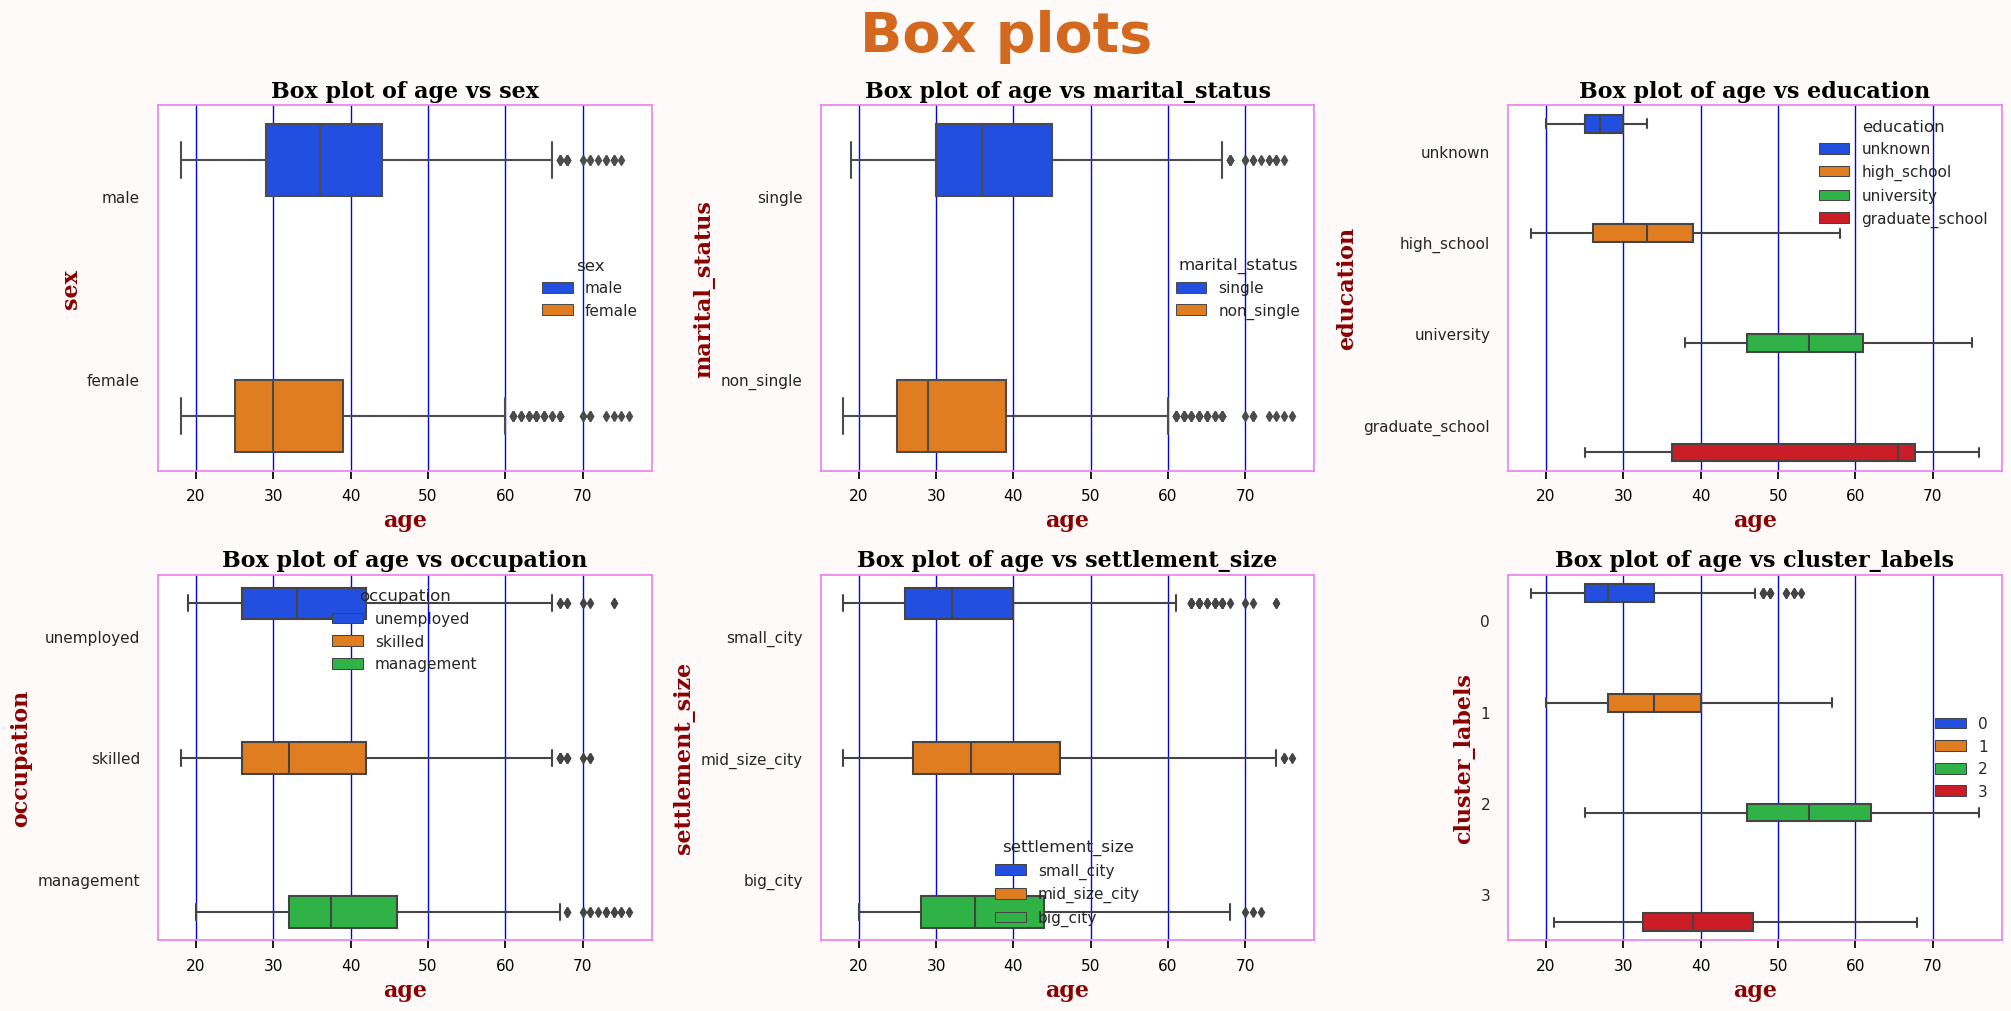

In [108]:
box_plot('age',cat2,cluster_anal)

**Observations**
- Those in cluster 2 seems to be older.
- Those in cluster 0  seems to be younger.
- Now the question is what features contains the above observastions?

In [110]:
cond_cluster2 = (cluster_anal.cluster_labels == 2) 
cluster_anal[cond_cluster2].sample(n=10,random_state=50)

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
163,male,single,70,university,224998,management,big_city,2
944,female,non_single,46,university,121501,skilled,small_city,2
137,male,single,66,university,126003,unemployed,small_city,2
27,female,non_single,42,university,163025,skilled,mid_size_city,2
1110,male,non_single,46,university,168904,management,mid_size_city,2


So it seems those in cluster 2 have a university degree?

In [120]:
(cluster_anal[cond_cluster2].value_counts().sum()) 
# There are 326 data points 
(cluster_anal[cond_cluster2].education == 'unknown').value_counts()
# There none with "unknown" education

False    326
Name: education, dtype: int64

In [122]:
(cluster_anal[cond_cluster2].education == 'high_school').value_counts()

False    307
True      19
Name: education, dtype: int64

In [124]:
(cluster_anal[cond_cluster2].education == 'university').value_counts()

True     271
False     55
Name: education, dtype: int64

In [123]:
(cluster_anal[cond_cluster2].education == 'graduate_school').value_counts()

False    290
True      36
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

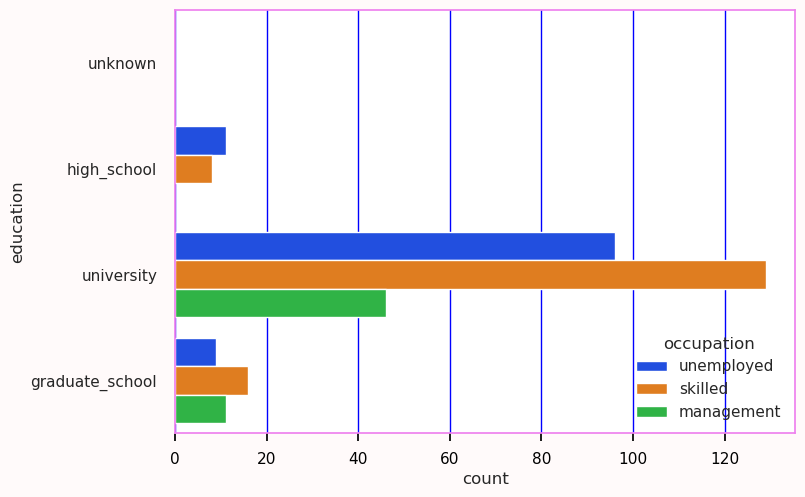

In [129]:
sns.countplot(
    data=cluster_anal[cond_cluster2],
    y='education',
    hue='occupation'
)

So those in cluster 2 mostly have university degree and are skilled workers.

In [128]:
cond_cluster0 = (cluster_anal.cluster_labels == 0) 
cluster_anal[cond_cluster0].sample(n=10,random_state=50)

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
1879,male,single,29,unknown,103439,skilled,small_city,0
1896,female,non_single,26,high_school,109887,skilled,small_city,0
1804,male,non_single,33,high_school,83687,unemployed,small_city,0
1620,female,single,31,unknown,76384,unemployed,small_city,0
364,male,single,25,unknown,43684,unemployed,small_city,0
1622,female,non_single,35,high_school,93155,unemployed,small_city,0
1323,female,non_single,25,high_school,94075,skilled,small_city,0
25,male,single,36,high_school,71909,unemployed,small_city,0
1768,female,single,31,unknown,72361,unemployed,small_city,0
1952,female,single,23,unknown,65062,unemployed,small_city,0


<AxesSubplot:xlabel='count', ylabel='education'>

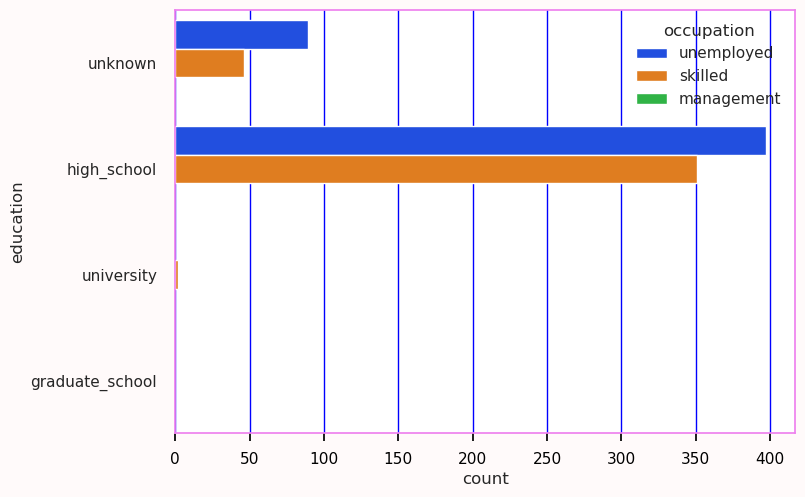

In [130]:
sns.countplot(
    data=cluster_anal[cond_cluster0],
    y='education',
    hue='occupation'
)

- For cluster 0, there is absolutely none in graduate school and none in management too.
- They mostly have high school diplomas and are having a high rate of unemployment.

In [147]:
my_frame = cluster_anal[cond_cluster0].education.value_counts()
my_frame= my_frame.to_frame().reset_index()
my_frame.rename(columns={'index':'education','education':'total_count'}, inplace=True)
my_frame

,education,total_count
0,high_school,748
1,unknown,135
2,university,2
3,graduate_school,0


In [148]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=my_frame.education,
                             values=my_frame.total_count)])


fig.update_layout(
width=1000,
title={"x": 0.5, "xanchor":"center", 
"font_family":"Times New Roman", 
"text":"SEGEMENATION OF EDUCATION"})

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker={'colors':colors, 'line_color':'#000000','line_width':2})

fig.show()

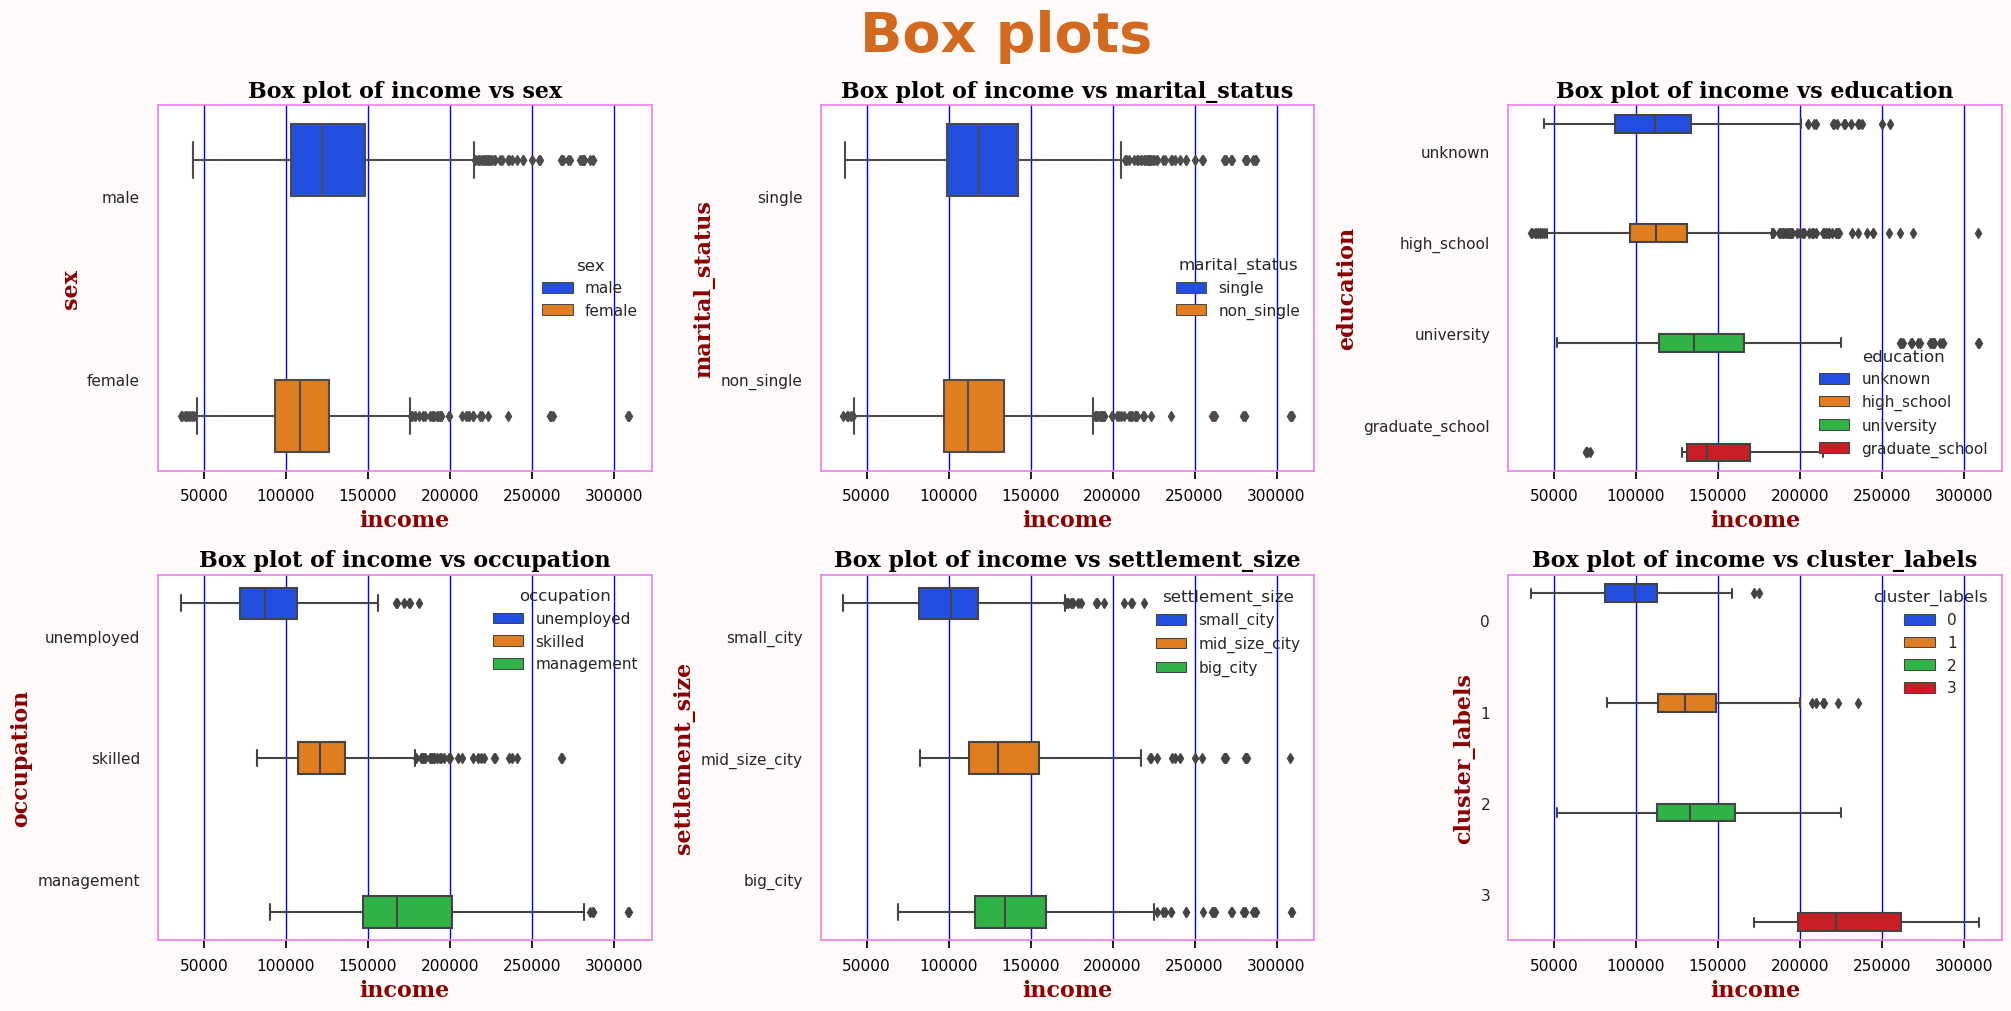

In [98]:
box_plot('income',cat2,cluster_anal)

Those in cluster 3 seems to have a higher income than others

In [155]:
cond_income = cluster_anal.income >= 180000
above_threshold = cluster_anal[cond_income].cluster_labels.value_counts().to_frame().reset_index().rename(columns={'index':"cluster_labels", "cluster_labels":"counts"})
above_threshold

,cluster_labels,counts
0,3,70
1,2,36
2,1,20
3,0,0


<AxesSubplot:xlabel='counts', ylabel='cluster_labels'>

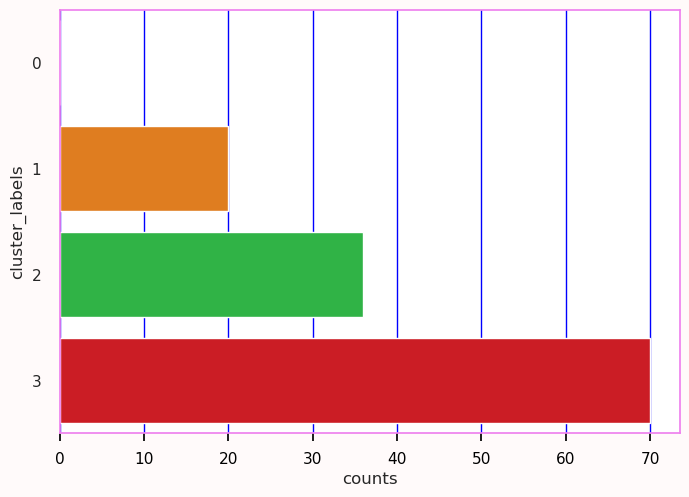

In [162]:
sns.barplot(
    data=above_threshold,
    y= "cluster_labels",
    x= 'counts'
)

So cluster 3 has the highest count than other clusters with an earning above 180000

<AxesSubplot:xlabel='count', ylabel='education'>

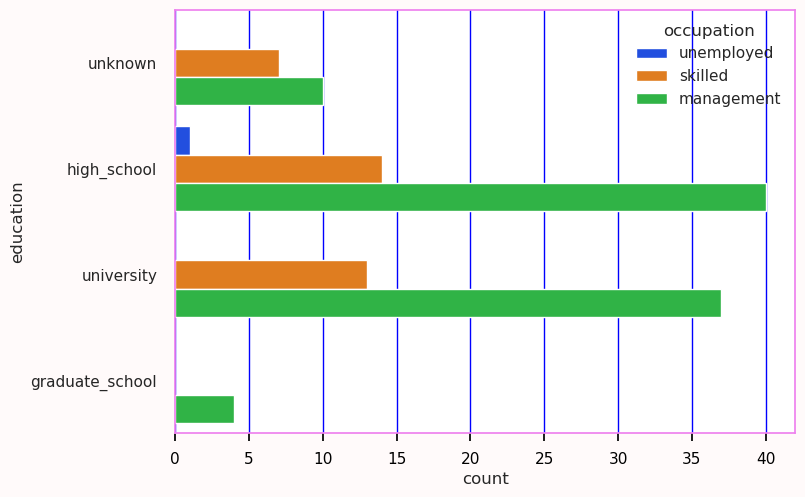

In [132]:
sns.countplot(
    data=cluster_anal[cond_income],
    y='education',
    hue='occupation'
)

- So those above or equal to an income of 180,000 are mostly in management positions.
- Seems like those with high school degrees are high in number.

In [133]:
cond_age = (cluster_anal.age >=30) & (cluster_anal.age < 50)
cond_occupation = cluster_anal.occupation == 'management'
cond_education = cluster_anal.education == 'high_school'
final_cond  = cond_age & cond_occupation & cond_education
cluster_anal[final_cond]

,sex,marital_status,age,education,income,occupation,settlement_size,cluster_labels
7,male,single,35,high_school,193621,management,mid_size_city,3
34,female,non_single,33,high_school,155569,management,mid_size_city,1
45,female,non_single,35,high_school,138387,management,mid_size_city,1
74,male,single,40,high_school,140888,management,big_city,1
99,male,single,36,high_school,195465,management,big_city,3
...,...,...,...,...,...,...,...,...
1278,male,single,35,high_school,150237,management,big_city,1
1289,male,single,49,high_school,118571,management,big_city,1
1296,male,single,33,high_school,151339,management,mid_size_city,1
1366,female,single,31,high_school,143321,management,mid_size_city,1


<AxesSubplot:xlabel='count', ylabel='cluster_labels'>

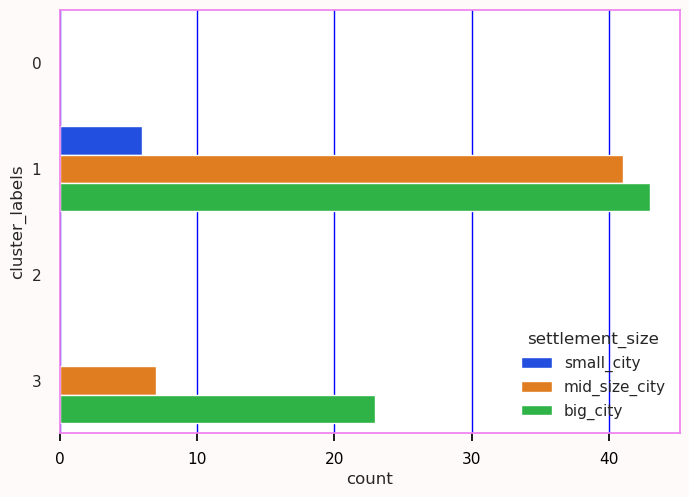

In [137]:
sns.countplot(
    data=cluster_anal[final_cond],
    y='cluster_labels',
    hue='settlement_size'
)

So those between the ages of 30 and 50, in management and  with high school diplomas are most likely to reside in big cities. 

Clusters 3 and 1 satifies these conditions, while the others do not.

In [165]:
cond = cluster_anal.settlement_size == 'small_city'
cluster_anal[final_cond & cond].settlement_size.value_counts()

small_city       6
mid_size_city    0
big_city         0
Name: settlement_size, dtype: int64

- A total of 66 people in big cities
- A total of 48 people in mid size cities
- A total of 6 people in small cities

In [169]:
# Saving for further analysis on PowerBi
cluster_anal.to_csv('../data/clustered.csv',index=False)